In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
## Setting the working directory
import os
import sys
print(os.getcwd())

/content/drive/My Drive/Colab_Notebook


In [51]:
os.chdir("/content/drive/MyDrive/Colab_Notebook")
print(os.getcwd())

/content/drive/MyDrive/Colab_Notebook


In [52]:
## Installing the required packages
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install scikit-learn
!pip install -U statsmodels
!pip install tensorflow

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from pandas import DataFrame
from datetime import timedelta
import collections
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm



In [54]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [55]:
##Time series data1 loading and changing the date column format to date data type
df1 = pd.read_csv("india_monthly_full_release_long_format-5.csv", header = 0, parse_dates = [5])
print(df1)

       Country Country code                State State code       State type  \
0        India          IND  Andaman and Nicobar         AN  Union territory   
1        India          IND  Andaman and Nicobar         AN  Union territory   
2        India          IND  Andaman and Nicobar         AN  Union territory   
3        India          IND  Andaman and Nicobar         AN  Union territory   
4        India          IND  Andaman and Nicobar         AN  Union territory   
...        ...          ...                  ...        ...              ...   
151312   India          IND          West Bengal         WB            state   
151313   India          IND          West Bengal         WB            state   
151314   India          IND          West Bengal         WB            state   
151315   India          IND          West Bengal         WB            state   
151316   India          IND          West Bengal         WB            state   

             Date                Catego

In [56]:
##loading the second data file and changing the date format to date data type
df2 = pd.read_excel("India-State-RES-capacity-data-and-targets_December-2022.xlsx", header=0, sheet_name = 'Capacity (MW)', parse_dates = [1])
print(df2)

              State       Date     Solar       Wind  Small hydro  Bioenergy
0     India (total) 2019-03-01  28225.72  35625.965      4593.15    9918.95
1     India (total) 2019-04-01  28724.22  35815.880      4594.15    9946.95
2     India (total) 2019-05-01  29454.26  36089.120      4603.75    9946.95
3     India (total) 2019-06-01  29594.32  36368.470      4604.80    9946.95
4     India (total) 2019-07-01  30116.39  36686.820      4604.80    9946.95
...             ...        ...       ...        ...          ...        ...
1743      Telangana 2022-12-01   4650.93    128.100        90.87     219.74
1744        Tripura 2022-12-01     16.67      0.000        16.01       0.00
1745  Uttar Pradesh 2022-12-01   2485.16      0.000        49.10    2192.89
1746    Uttarakhand 2022-12-01    575.46      0.000       218.82     139.44
1747    West Bengal 2022-12-01    179.83      0.000        98.50     323.70

[1748 rows x 6 columns]


In [57]:
##finding the discrepancies in the state name in dataset 1 and dataset2
df1_state_name = df1['State'].unique()
print(df1_state_name)
df2_state_name = df2['State'].unique()
print(df2_state_name)

dif_st1 = [st1 for st1 in df1_state_name if st1 not in df2_state_name]
dif_st2 = [st2 for st2 in df2_state_name if st2 not in df1_state_name]
print(dif_st1)
print(dif_st2)



['Andaman and Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'India Total' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Others' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
['India (total)' 'Andaman & Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhatisgarh' 'Dadar & Nagar Haveli'
 'Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshwadeep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Others' 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Be

In [58]:
##Making a column in df2 for state_corrected names
# Step 2: Add a new column at the end by default
df2['State_Corrected'] = df2['State']
# Step 3: Move the new column to the second position
abbreviation_column = df2.pop('State_Corrected')
df2.insert(1, 'State_Corrected', abbreviation_column)
print(df2)

              State State_Corrected       Date     Solar       Wind  \
0     India (total)   India (total) 2019-03-01  28225.72  35625.965   
1     India (total)   India (total) 2019-04-01  28724.22  35815.880   
2     India (total)   India (total) 2019-05-01  29454.26  36089.120   
3     India (total)   India (total) 2019-06-01  29594.32  36368.470   
4     India (total)   India (total) 2019-07-01  30116.39  36686.820   
...             ...             ...        ...       ...        ...   
1743      Telangana       Telangana 2022-12-01   4650.93    128.100   
1744        Tripura         Tripura 2022-12-01     16.67      0.000   
1745  Uttar Pradesh   Uttar Pradesh 2022-12-01   2485.16      0.000   
1746    Uttarakhand     Uttarakhand 2022-12-01    575.46      0.000   
1747    West Bengal     West Bengal 2022-12-01    179.83      0.000   

      Small hydro  Bioenergy  
0         4593.15    9918.95  
1         4594.15    9946.95  
2         4603.75    9946.95  
3         4604.80    99

In [59]:
df2_copy = df2.copy()
df2_copy.head()

State State_Corrected       Date     Solar       Wind  Small hydro  \
0  India (total)   India (total) 2019-03-01  28225.72  35625.965      4593.15   
1  India (total)   India (total) 2019-04-01  28724.22  35815.880      4594.15   
2  India (total)   India (total) 2019-05-01  29454.26  36089.120      4603.75   
3  India (total)   India (total) 2019-06-01  29594.32  36368.470      4604.80   
4  India (total)   India (total) 2019-07-01  30116.39  36686.820      4604.80   

   Bioenergy  
0    9918.95  
1    9946.95  
2    9946.95  
3    9946.95  
4    9946.95

In [60]:
##Creating a lookup table to map between relationships
Mapping = {'India (total)' : 'India Total', 'Andaman & Nicobar' : 'Andaman and Nicobar', 'Chhatisgarh' : 'Chhattisgarh',
          'Dadar & Nagar Haveli' : 'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu' : 'Dadra and Nagar Haveli and Daman and Diu',
          'Jammu & Kashmir' : 'Jammu and Kashmir', 'Lakshwadeep' : 'Lakshadweep', 'Pondicherry' : 'Puducherry'}

In [61]:
for k, v in Mapping.items():
    df2_copy.loc[df2_copy["State"] == k, "State_Corrected"] = v
df2_copy.tail(15)

State State_Corrected       Date     Solar     Wind  \
1733      Meghalaya       Meghalaya 2022-12-01      4.15     0.00   
1734        Mizoram         Mizoram 2022-12-01      8.01     0.00   
1735       Nagaland        Nagaland 2022-12-01      3.04     0.00   
1736         Odisha          Odisha 2022-12-01    452.72     0.00   
1737         Others          Others 2022-12-01     45.01     4.30   
1738    Pondicherry      Puducherry 2022-12-01     35.53     0.00   
1739         Punjab          Punjab 2022-12-01   1153.21     0.00   
1740      Rajasthan       Rajasthan 2022-12-01  16340.75  4681.82   
1741         Sikkim          Sikkim 2022-12-01      4.68     0.00   
1742     Tamil Nadu      Tamil Nadu 2022-12-01   6412.36  9936.02   
1743      Telangana       Telangana 2022-12-01   4650.93   128.10   
1744        Tripura         Tripura 2022-12-01     16.67     0.00   
1745  Uttar Pradesh   Uttar Pradesh 2022-12-01   2485.16     0.00   
1746    Uttarakhand     Uttarakhand 2022-12-01    575.46     0.00   
1747    West Bengal     West Bengal 2022-12-01    179.83     0.00   

      Small hydro  Bioenergy  
1733        32.53      13.80  
1734        41.47       0.00  
1735        31.67       0.00  
1736       115.63      59.22  
1737         0.00       0.00  
1738         0.00       0.00  
1739       176.10     498.94  
1740        23.85     125.08  
1741        55.11       0.00  
1742       123.05    1042.70  
1743        90.87     219.74  
1744        16.01       0.00  
1745        49.10    2192.89  
1746       218.82     139.44  
1747        98.50     323.70

In [62]:
##doing groupy on Dadar and Nadar Havel and Danan And Diu as they are together in the first dataset and aggregating their values
df2_copy_groupby = df2_copy.groupby(['Date', 'State_Corrected'], as_index = False).agg({
                                                                            'Solar': 'sum', 'Wind': 'sum',
                                                                            'Small hydro': 'sum', 'Bioenergy': 'sum'
                                                                                        })
df2_copy_groupby.head()


Date      State_Corrected    Solar     Wind  Small hydro  Bioenergy
0 2019-03-01  Andaman and Nicobar    11.73     0.00        5.250       0.00
1 2019-03-01       Andhra Pradesh  3085.68  4090.45      162.110     500.34
2 2019-03-01    Arunachal Pradesh     5.39     0.00      131.105       0.00
3 2019-03-01                Assam    22.40     0.00       34.110       2.00
4 2019-03-01                Bihar   142.45     0.00       70.700     121.20

In [63]:
df2_copy_groupby.rename(columns= {'State_Corrected': 'State',
                                  'Solar':'Solar_MW',
                                  'Wind': 'Wind_MW',
                                  'Small hydro':'Small_hydro_MW',
                                  'Bioenergy': 'Bioenergy_MW'}, inplace=True)

In [64]:
df_merged = pd.merge(df1, df2_copy_groupby, on=['Date', 'State'], how='left')

In [65]:
##Loading the third dataset
df3 = pd.read_csv("india-installed-capacity-by-state.csv", header = 0, parse_dates=[0])

In [66]:
# reading monthly installed capacity data here
df3 = pd.read_csv("india-installed-capacity-by-state.csv", header = 0, parse_dates = [0])
print(df3)

           Month              State      Source Unit  Installed_Capacity
0     2019-01-01         Chandigarh        Coal   MW                0.00
1     2019-01-01              Delhi        Coal   MW              135.00
2     2019-01-01            Haryana        Coal   MW             5540.00
3     2019-01-01   Himachal Pradesh        Coal   MW                0.00
4     2019-01-01  Jammu and Kashmir        Coal   MW                0.00
...          ...                ...         ...  ...                 ...
13861 2023-08-01              India  Renewables   MW           131514.62
13862 2023-09-01              India  Renewables   MW           131783.39
13863 2023-10-01              India  Renewables   MW           132132.44
13864 2023-11-01              India  Renewables   MW           138444.03
13865 2023-12-01              India  Renewables   MW           133886.19

[13866 rows x 5 columns]


In [67]:
df3.rename(columns= {   'Month': 'Date',
                        'Source':'Variable',
                        'Installed_Capacity':'Value',
                    }, inplace=True)

In [68]:
df3['Category'] = 'Installed Capacity'
df3['Subcategory'] = 'Fuel'

In [69]:
df3_state_name = df3['State'].unique()

dif_st1 = [st1 for st1 in df1_state_name if st1 not in df3_state_name]
dif_st3 = [st3 for st3 in df3_state_name if st3 not in df1_state_name]
print(dif_st1)
print(dif_st3)

['Andaman and Nicobar', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'India Total', 'Others']
['Andaman & Nicobar Islands', 'Chhatisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Andhra Pradesh.', 'Dadra and Nagar Haveli and Dam', 'India']


In [70]:
Mapping1to3 = {'India' : 'India Total', 'Andaman & Nicobar Islands' : 'Andaman and Nicobar', 'Chhatisgarh' : 'Chhattisgarh',
          'Dadra & Nagar Haveli' : 'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu' : 'Dadra and Nagar Haveli and Daman and Diu',
          'Dadra and Nagar Haveli and Dam':'Dadra and Nagar Haveli and Daman and Diu',
          'Andhra Pradesh.' : 'Andhra Pradesh'}

In [71]:
fuel_df = df1[df1['Subcategory'] == 'Fuel']
fuel_df['Variable'].unique()

array(['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Other Fossil',
       'Other Renewables', 'Solar', 'Wind'], dtype=object)

In [72]:
Mapping1to3_fuels = {'Diesel': 'Other Fossil'}

In [73]:
df3_copy = df3.copy()

for k, v in Mapping1to3.items():
    df3_copy.loc[df3_copy["State"] == k, "State"] = v


In [74]:
for k, v in Mapping1to3_fuels.items():
    df3_copy.loc[df3_copy["Variable"] == k, "Variable"] = v


In [75]:
df3_copy_dropped = df3_copy[df3_copy['Variable'] != 'Renewables']

In [76]:
df4 = df2_copy_groupby.copy()
df4_melted = pd.melt(df4, id_vars=['Date', 'State'], var_name='Variable', value_name='Value')

df4_melted['Variable'] = df4_melted['Variable'].replace({
    'Solar_MW': 'Solar',
    'Wind_MW': 'Wind',
    'Bioenergy_MW': 'Bioenergy',
    'Small_hydro_MW': 'Other Renewables'
})

df4_melted['Category'] = 'Installed Capacity'
df4_melted['Subcategory'] = 'Fuel'
df4_melted['Unit'] = 'MW'

In [77]:
df_merged_installed = pd.concat([df3_copy_dropped, df4_melted], ignore_index=True)

In [78]:
df_merged_clean = pd.concat([df1, df_merged_installed], ignore_index=True)

In [79]:
df_merged_clean.to_csv('df_merged_clean.csv', index = False)

In [80]:
# Loading the clean and merged dataset of dataset 1, dataset 2 and dataset 3
df = pd.read_csv("df_merged_clean.csv", header = 0, parse_dates=[5])
print(df)

       Country Country code                State State code       State type  \
0        India          IND  Andaman and Nicobar         AN  Union territory   
1        India          IND  Andaman and Nicobar         AN  Union territory   
2        India          IND  Andaman and Nicobar         AN  Union territory   
3        India          IND  Andaman and Nicobar         AN  Union territory   
4        India          IND  Andaman and Nicobar         AN  Union territory   
...        ...          ...                  ...        ...              ...   
169675     NaN          NaN            Telangana        NaN              NaN   
169676     NaN          NaN              Tripura        NaN              NaN   
169677     NaN          NaN        Uttar Pradesh        NaN              NaN   
169678     NaN          NaN          Uttarakhand        NaN              NaN   
169679     NaN          NaN          West Bengal        NaN              NaN   

             Date                Catego

In [81]:
df_install_agg = df[df['Category'] == 'Installed Capacity']
df_install_agg.shape

(18363, 13)

In [82]:
##As we will analyze only aggregate feul "renewables" and "fossil", for installed capacity, aggregating the values of individual energy sources to make renewable and fossil aggregate
df_install_agg['Variable'] = df_install_agg['Variable'].replace({'Coal': 'Fossil',
                                                             'Other Fossil': 'Fossil',
                                                             'Gas': 'Fossil',
                                                             'Hydro': 'Renewables',
                                                             'Solar': 'Renewables',
                                                             'Wind': 'Renewables',
                                                             'Other Renewables': 'Renewables',
                                                             'Bioenergy': 'Renewables',
                                                             })
df_install_agg['Subcategory'] = df_install_agg['Subcategory'].replace({'Fuel': 'Aggregate fuel'})

# Group by col1, col2, and col3, then sum col4
result = df_install_agg.groupby(['State', 'Date', 'Category' , 'Subcategory', 'Variable', 'Unit'], as_index=False)['Value'].sum()


<ipython-input-82-5aa4ed8fd9ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_install_agg['Variable'] = df_install_agg['Variable'].replace({'Coal': 'Fossil',
<ipython-input-82-5aa4ed8fd9ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_install_agg['Subcategory'] = df_install_agg['Subcategory'].replace({'Fuel': 'Aggregate fuel'})


In [83]:
print(result.shape)
df6 = pd.concat([df, result], ignore_index=True)

(6670, 7)


In [84]:
##now for time series analysis, drooping off extra column
drop_list = ['Country','Country code','State code','State type','YoY absolute change','YoY % change']
for col in drop_list:
    if col in df6.columns:
      del df6[col]
df6.tail()


State       Date            Category     Subcategory  \
176345  West Bengal 2023-11-01  Installed Capacity  Aggregate fuel   
176346  West Bengal 2023-11-01  Installed Capacity  Aggregate fuel   
176347  West Bengal 2023-12-01  Installed Capacity  Aggregate fuel   
176348  West Bengal 2023-12-01  Installed Capacity  Aggregate fuel   
176349  West Bengal 2023-12-01  Installed Capacity  Aggregate fuel   

          Variable Unit    Value  
176345     Nuclear   MW      0.0  
176346  Renewables   MW   1341.2  
176347      Fossil   MW  13567.0  
176348     Nuclear   MW      0.0  
176349  Renewables   MW   1341.2

In [85]:
df6['Unit'].unique()

array(['%', 'GWh', 'ktCO2', 'gCO2/kWh', 'MW'], dtype=object)

In [86]:
##lists containing possible values of different columns, to create a look up table
State_list = ['Maharashtra', 'Tamil Nadu', 'Gujarat', 'Rajasthan', 'Karnataka', 'Andhra Pradesh']#[-2:-1]
Category_list = ['Electricity generation', 'Power sector emissions',
       'Installed Capacity']
Subcategory_list = ['Aggregate fuel']
Variable_list = ['Fossil', 'Renewables']
Unit_list = ['GWh', 'ktCO2', 'MW']
unit_mapping = {'Electricity generation': 'GWh', 'Power sector emissions': 'ktCO2', 'Installed Capacity': 'MW'}

variable_combinations = []
for state in State_list:
    for category in Category_list:
        for subcategory in Subcategory_list:
            for variable in Variable_list:
                    variable_combinations.append((state, category, subcategory, variable, unit_mapping[category]))

for item in variable_combinations:
    print(item)

('Maharashtra', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
('Maharashtra', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
('Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
('Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
('Maharashtra', 'Installed Capacity', 'Aggregate fuel', 'Fossil', 'MW')
('Maharashtra', 'Installed Capacity', 'Aggregate fuel', 'Renewables', 'MW')
('Tamil Nadu', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
('Tamil Nadu', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
('Tamil Nadu', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
('Tamil Nadu', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
('Tamil Nadu', 'Installed Capacity', 'Aggregate fuel', 'Fossil', 'MW')
('Tamil Nadu', 'Installed Capacity', 'Aggregate fuel', 'Renewables', 'MW')
('Gujarat', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh

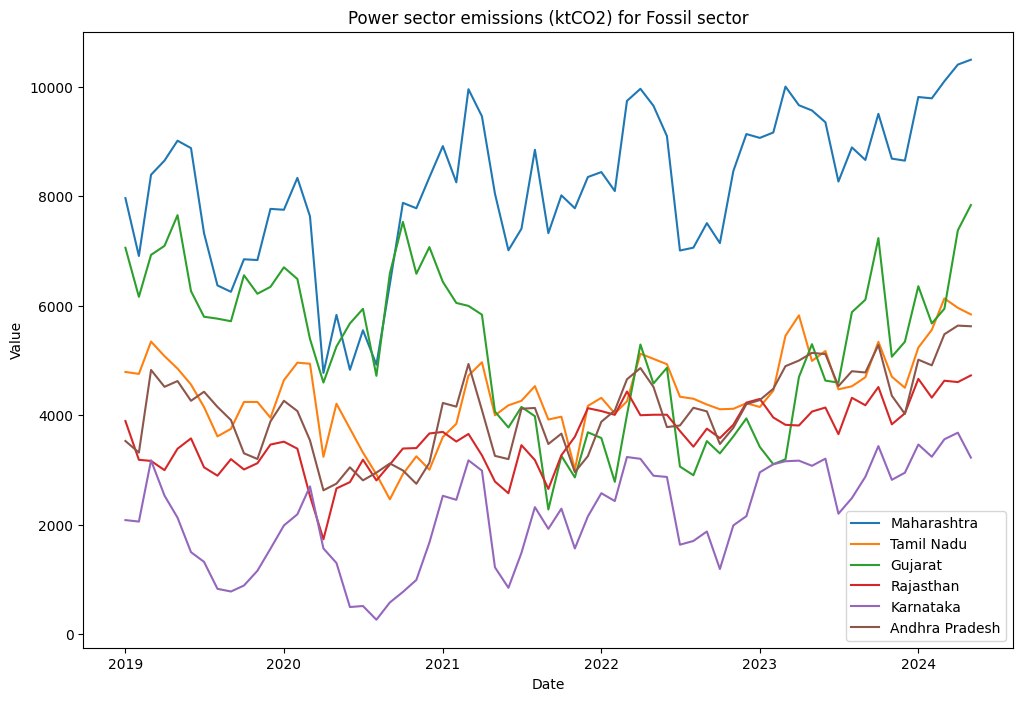

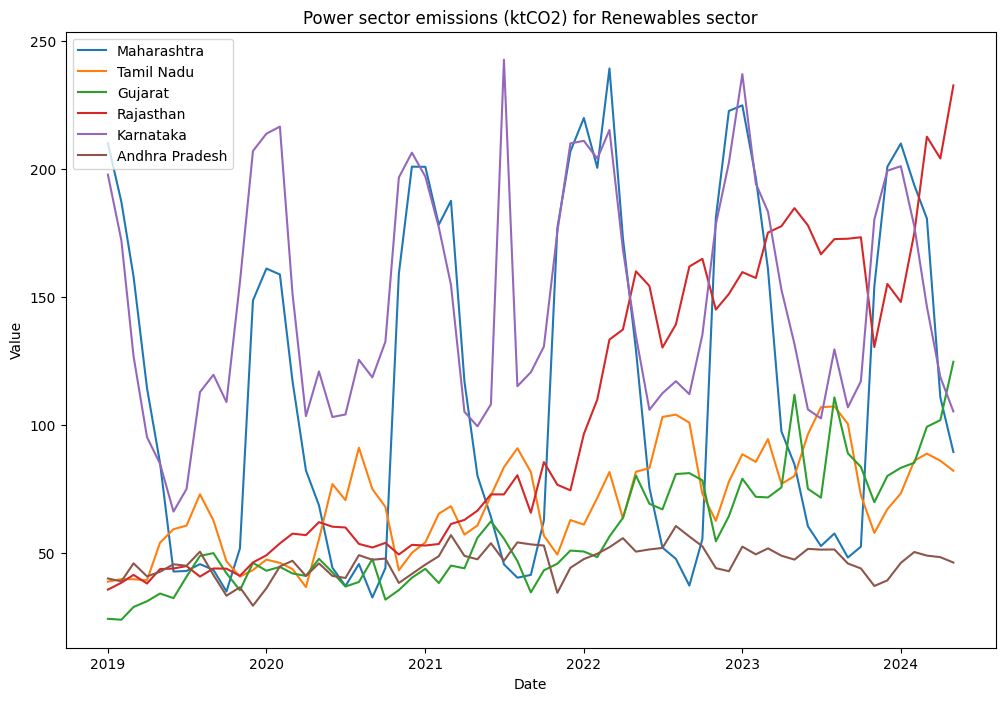

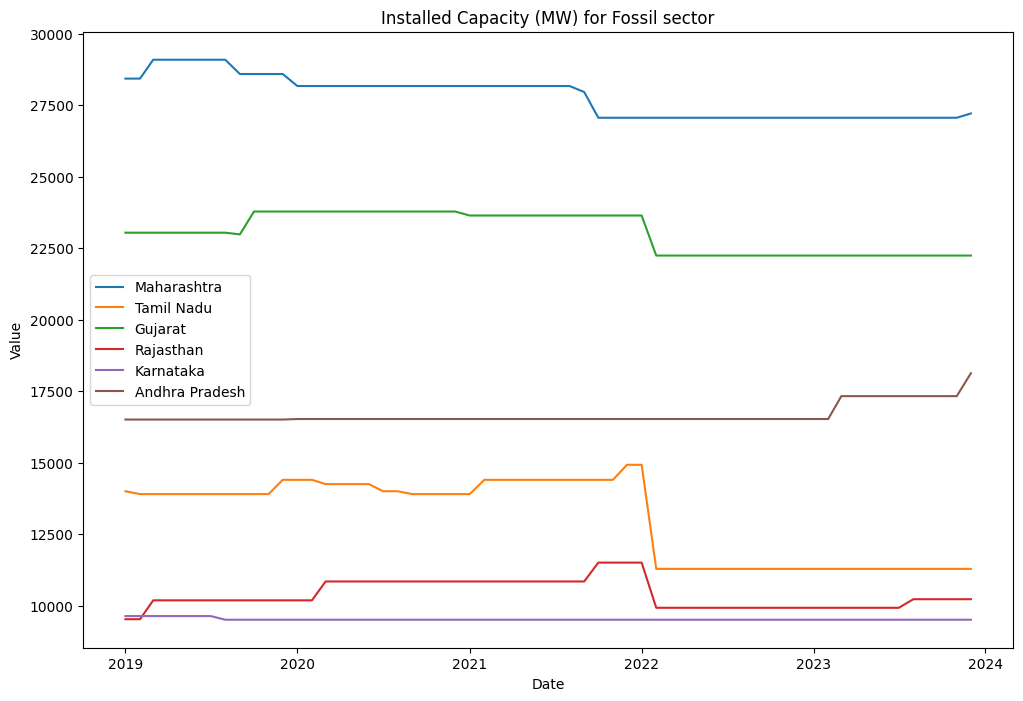

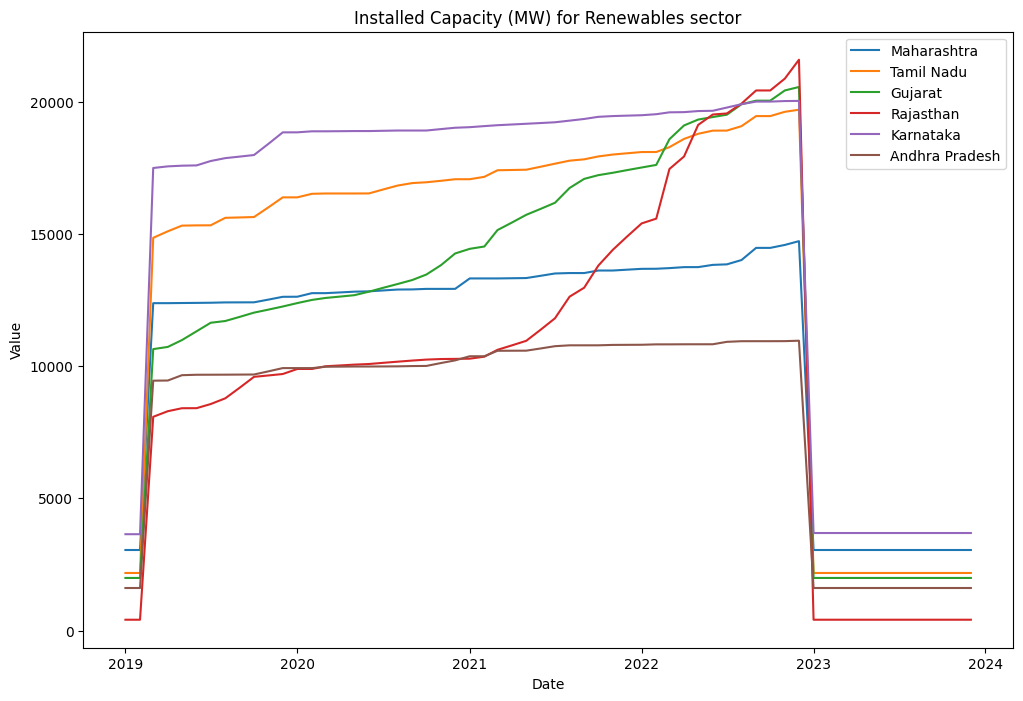

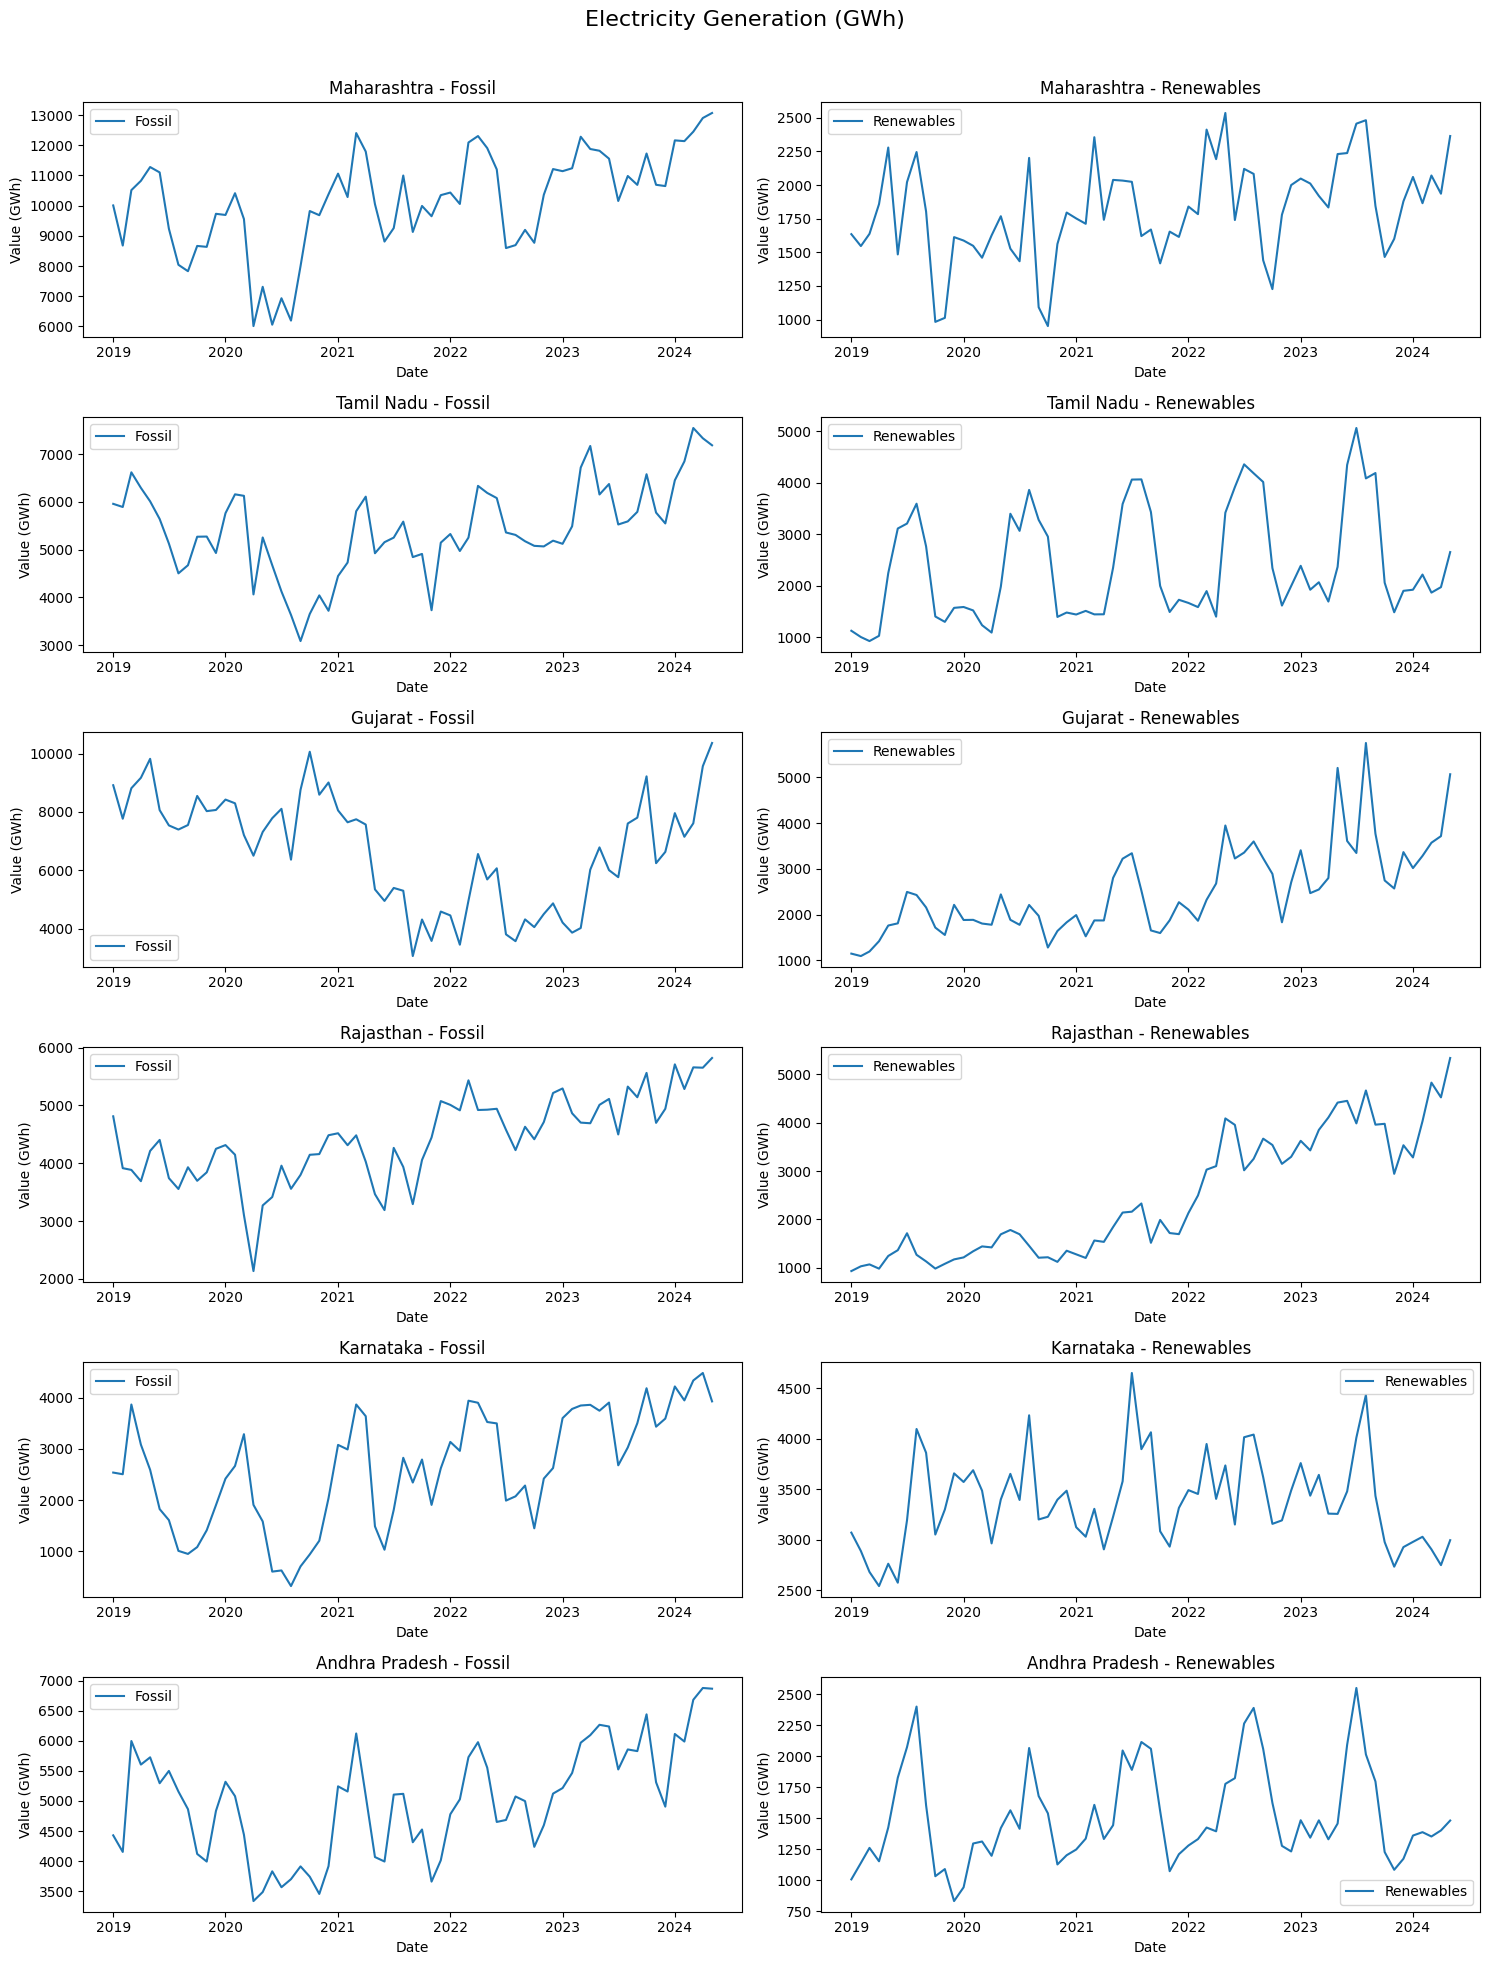

In [87]:
##Filtering rows which have given configuration
df_filtered = df6[(df6['State'].isin(State_list)) &
                 (df6['Category'].isin(Category_list)) &
                 (df6['Unit'].isin(unit_mapping.values())) &
                 (df6['Variable'].isin(Variable_list)) &
                 (df6['Subcategory'].isin(Subcategory_list))]

# Function to plot data for a given category
def plot_category(df, category, variable, unit):
    if category == 'Electricity generation':
      return
    plt.figure(figsize=(12, 8))
    for state in State_list:
        df_state = df6[(df6['Category'] == category) & (df6['State'] == state) & (df6['Variable'] == variable)]
        plt.plot(df_state['Date'], df_state['Value'], label=state)
    plt.title(f'{category} ({unit}) for {variable} sector')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot for each category
for category in Category_list:
  for variable in Variable_list:
    plot_category(df_filtered, category, variable, unit_mapping[category])


  #-----------------------------------------------------------------------------------------
  # Function to plot data for a given state and variable
def plot_state_variable(df, state, variable):
    df_state = df[(df['State'] == state) & (df['Variable'] == variable) & (df['Category'] == 'Electricity generation')]
    plt.plot(df_state['Date'], df_state['Value'], label=variable)
    plt.title(f'{state} - {variable}')
    plt.xlabel('Date')
    plt.ylabel('Value (GWh)')
    plt.legend()

# Plot for each state and variable in a 3x4 matrix
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
fig.suptitle('Electricity Generation (GWh)', fontsize=16)
axes = axes.flatten()

for i, state in enumerate(State_list):
    for j, variable in enumerate(Variable_list):
        plt.sca(axes[i*2 +j])
        plot_state_variable(df_filtered, state, variable)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [88]:
##lookup table containing hyperparameters for ARIMA, SARIMA, RANDOM FOREST for different Time Series Dataset
model_params = collections.defaultdict(dict)
for key in variable_combinations:

  model_params[key]['p'] = 5
  model_params[key]['d'] = 1 #0 or 1 or 2 or 3
  model_params[key]['q'] = 1
  model_params[key]['m'] = 12
  model_params[key]['P'] = 1
  model_params[key]['D'] = 1
  model_params[key]['Q'] = 1
  model_params[key]['n_estimators'] = 4
  model_params[key]['n_features_to_select'] = 4

In [89]:
def cal_accuracy(y_gt, y_pred):
  y_gt = np.abs(y_gt.to_numpy())
  y_pred = np.abs(y_pred.to_numpy())
  mse = mean_squared_error(y_gt, y_pred)
  mae = mean_absolute_error(y_gt, y_pred)

  div = np.maximum(y_gt, y_pred) + 1e-6

  acc = (1 - np.mean(np.abs(y_gt - y_pred) / div)) * 100
  return mse, mae, acc
def create_lag(df_data_3_filtered, win_size = 12):
  df_data_filtered = df_data_3_filtered.copy()
  dataframe = DataFrame()
  for i in range(win_size, 0, -1):
    dataframe['t-' + str(i)] = df_data_filtered['Value'].shift(i)
  final_data = pd.concat([df_data_filtered, dataframe], axis=1)
  final_data.dropna(inplace=True)
  return final_data
##This is the main training function for different models for one particular time series
def run_model_training(dataframe, combinaton_to_run, model_name, model_params, visual_model_test = False, visual_model_train = False, visual_basic = False):
  df = dataframe.copy()
  # Filter the dataset with these conditions
  key = combinaton_to_run
  state, category, subcategory, variable, unit = key

  df_data_filtered = df[(df['State'] == state) &
                            (df['Category'] == category) &
                            (df['Subcategory'] == subcategory) &
                            (df['Variable'] == variable) &
                            (df['Unit'] == unit)]

  # Sort the filtered data by date
  df_data_filtered = df_data_filtered.sort_values(by='Date')
  #print(df_data_filtered.head(2))
  ##### let's see this #####
  # Check for NaN values in the entire DataFrame
  has_nan = df_data_filtered.isna().any().any()
  print(f"Does the filtered DataFrame have any NaN values? {has_nan}")

  # Check for NaN values column-wise
  nan_counts = df_data_filtered.isna().sum()
  print("\nNaN values in each column:")
  #print(nan_counts)

  # Check for rows with any NaN values
  rows_with_nan = df_data_filtered.isna().any(axis=1)
  print(f"\nNumber of rows with any NaN values: {rows_with_nan.sum()}")

  # Display rows with NaN values
  print("\nRows with NaN values:")
  #print(df_data_filtered[rows_with_nan])


  ##Changing the position of date column as index
  df_data_filtered.set_index('Date', inplace=True)
  df_data_filtered['Date'] = df_data_filtered.index
  df_filtered_data_dropped = df_data_filtered.copy()
  #print(df_filtered_data_dropped.head(2))

  test_length = 13
  if model_name == 'naive':
    ##Create a lag 1
    df_data_filtered['v'] = df_data_filtered['Value'].shift(1)
    #print(df_data_filtered.head(2))
    ##Dropping the first row of the dataset due to NAN values
    df_filtered_data_dropped = df_data_filtered.iloc[1:]
    #print(df_filtered_data_dropped.head(2))

    # Create training and testing datasets
    train, test = df_filtered_data_dropped[:-test_length], df_filtered_data_dropped[-test_length:]
    #print(test)
    train_X, train_y = train['v'], train['Value']
    test_X, test_y = test['v'], test['Value']
    predictions_on_train = train_X.copy()
    predictions = test_X.copy()
  if model_name == 'arima' or model_name == 'sarima':
    # Create training and testing datasets
    train, test = df_filtered_data_dropped[:-test_length], df_filtered_data_dropped[-test_length:]
    train_X, test_y = train['Value'], test['Value']
    train_y = train_X[1:].copy()
    # this outlier detection and removal can be removed if needed
    uv = np.percentile(train_X, [95])[0]
    lv = np.percentile(train_X, [5])[0]
    print(f"\n\n uppper-value: {uv}")
    print(f"\n\n lower-value: {lv}")
    #print(train_X)
    train_X = train_X.clip(lower=0.5*lv, upper=2*uv)
    # import pdb
    # pdb.set_trace()
    df_filtered_data_dropped['Value'][:-test_length] = train_X

  p,d,q,m,P,D,Q = model_params[key]['p'], model_params[key]['d'], model_params[key]['q'], model_params[key]['m'], model_params[key]['P'], model_params[key]['D'], model_params[key]['Q']
  n_estimators = model_params[key]['n_estimators']
  n_features_to_select = model_params[key]['n_features_to_select']



  if visual_basic and (model_name == 'arima' or model_name == 'sarima'):
    # Perform the Augmented Dickey-Fuller test
    ts_data = train_X.copy()
    adf_test = adfuller(ts_data)
    print("P-value: ", adf_test[1])
    sd = seasonal_decompose(train_X, model = "multiplicative")
    plt.figure(figsize=(8, 4))
    sd.plot(); #plt.plot(sd)
    plt.title(f"Seasonal decompose"); plt.legend(); plt.show(); plt.close()
    # Make predictions
    ##Autocorrelation Plot ##P = 12 OF ARMIA P,D,Q
    autocorrelation_plot(train_X)
    ##Partial Autocorrelation Graph ##Q of ARUMS MODEL, so Q value is 1
    plot_pacf(train_X, lags=20)
  if model_name == 'arima':
    model = ARIMA(train_X, order=(p,d,q)).fit()  # (p,d,q) order - can be tuned
  if model_name == 'sarima':
    model = sm.tsa.statespace.SARIMAX(train_X, order=(p,d,q), seasonal_order=(P, D, Q, m)).fit()
  if model_name == 'arima' or model_name == 'sarima':
    if visual_basic:
      #print(model.summary())
      residuals = model.resid
      plt.figure(figsize=(8, 4))

      plt.plot(residuals, label = 'residuals')
      plt.title(f"Residuals"); plt.legend(); plt.show(); plt.close()
    # Make predictions
    predictions = model.forecast(steps=len(test_y))

    # pred on train set
    start = max(p, q)
    predictions_on_train = model.predict(start= start, end=len(train_X), typ='levels')

  if model_name == "RF":
    # drop string/categorical columns
    drop_list = ['Country','Country code','State','State code','State type','Category','Subcategory','Variable','Unit','YoY absolute change','YoY % change']
    for col in drop_list:
        if col in df_filtered_data_dropped.columns:
          del df_filtered_data_dropped[col]
    final_data = create_lag(df_filtered_data_dropped)
    final_data['month'] = final_data['Date'].dt.month

    # create one-hot encoding, can be dropped
    dummy = pd.get_dummies(final_data['month'])
    final_data = pd.concat([final_data, dummy], axis=1)
    final_data.columns = final_data.columns.astype(str)
    finaldf = final_data.drop(['Date'], axis=1)
    finaldf = finaldf.reset_index(drop=True)
    end_point = len(finaldf)
    x = end_point - test_length
    finaldf_train = finaldf.loc[:x - 1, :]

    ##  model train
    finaldf_test = finaldf.loc[x:, :]
    finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'Value']
    finaldf_test_y = finaldf_test['Value']
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'Value']
    finaldf_train_y = finaldf_train['Value']
    print("Starting model train..")
    rfe = RFE(estimator=RandomForestRegressor(n_estimators=n_estimators, random_state=42), n_features_to_select=n_features_to_select)

    model = rfe.fit(finaldf_train_x, finaldf_train_y)
    predictions = model.predict(finaldf_test_x)
    print('model training ended')

    train_y = finaldf_train_y.copy()
    predictions_on_train = model.predict(finaldf_train_x)
    predictions_on_train = pd.DataFrame(predictions_on_train)
    test_y = pd.DataFrame(finaldf_test_y.copy())
    predictions = pd.DataFrame(predictions.copy())




  ###start modelling from here

  mse, mae, acc = cal_accuracy(test_y, predictions)
  print('\n\n\n---------------------------------------------------------')
  print(f'Mean Squared Error for {model_name}: {mse}')
  print(f'Mean Absolute Error for {model_name}: {mae}')
  print(f'Accuracy(%) for {model_name}: {acc}')

  if visual_model_test:
    plt.figure(figsize=(8, 4))
    plt.plot(test_y.to_numpy(), color = 'blue', label = 'GT')
    plt.plot(predictions.to_numpy(), color ='red', label = 'PRED')
    plt.title(f"Test set predictions");
    plt.legend()
    plt.show(); plt.close()

  if visual_model_train:
    plt.figure(figsize=(8, 4))

    plt.plot(train_y.to_numpy(), color = 'blue', label = 'GT')
    plt.plot(predictions_on_train.to_numpy(), color ='red', label = 'PRED')
    plt.title(f"Train set predictions"); plt.legend(); plt.show(); plt.close()
    # Make predictions
  return (mse, mae, acc)



 data samples 36





####### exec start ##########
exec for naive with index: 0
('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 342915.14904615405
Mean Absolute Error for naive: 434.94461538461553
Accuracy(%) for naive: 93.02677207373888
####### exec end ##########





####### exec start ##########
exec for sarima with index: 0
('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:


 uppper-value: 5985.6005


 lower-value: 3530.5280000000002
P-value:  0.014519833228855673


<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

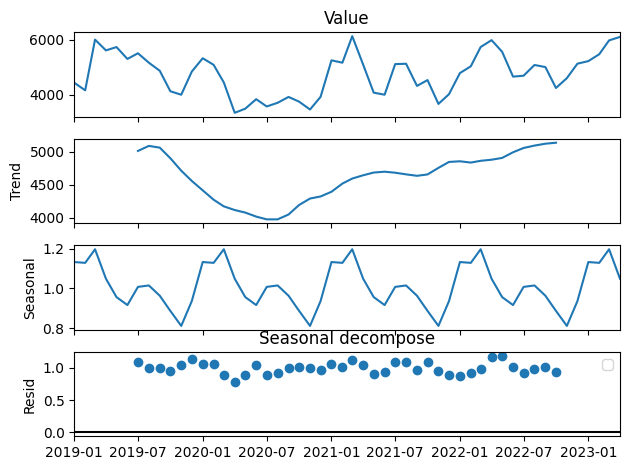

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


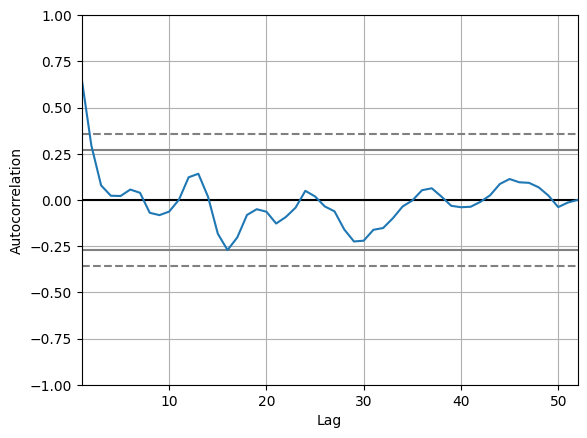

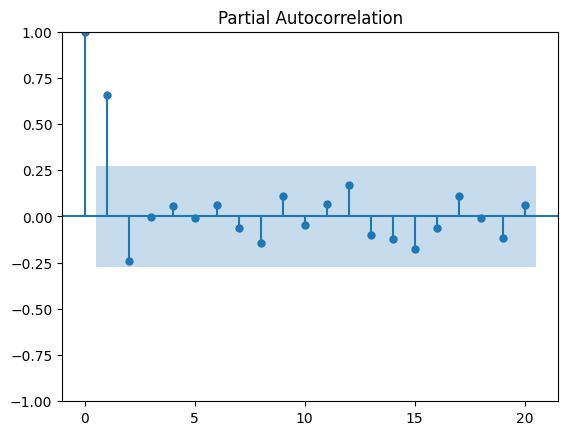

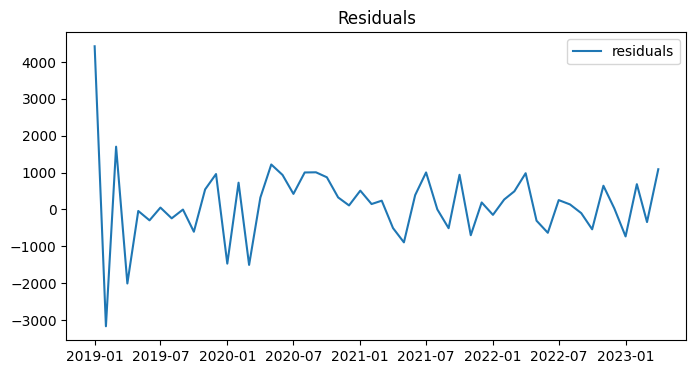

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 344467.0432935257
Mean Absolute Error for sarima: 473.7985720202505
Accuracy(%) for sarima: 92.72881350290196
####### exec end ##########





####### exec start ##########
exec for naive with index: 1
('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 104616.8160076923
Mean Absolute Error for naive: 242.36692307692311
Accuracy(%) for naive: 87.1770730206627
####### exec end ##########





####### exec start ##########
exec for sarima with index: 1
('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows wi

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

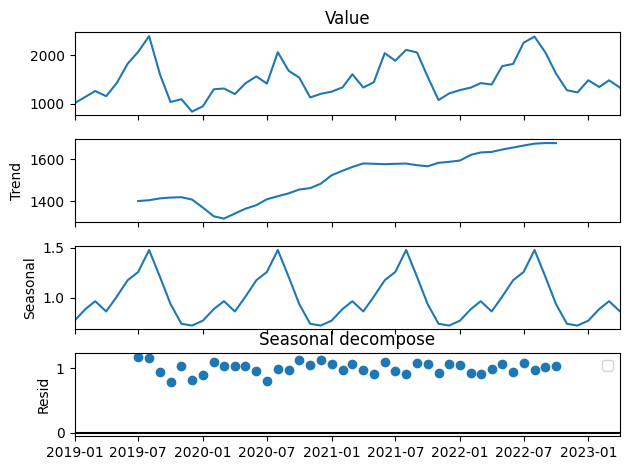

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


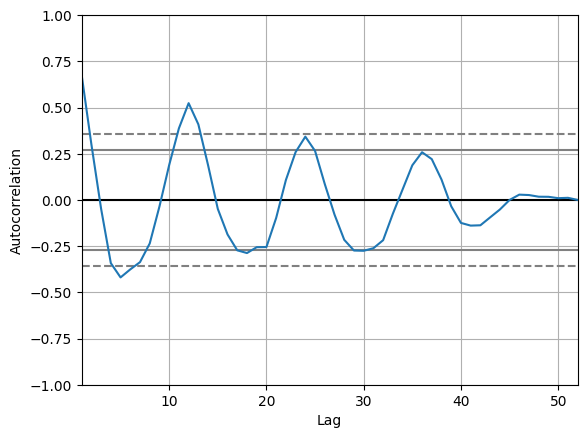

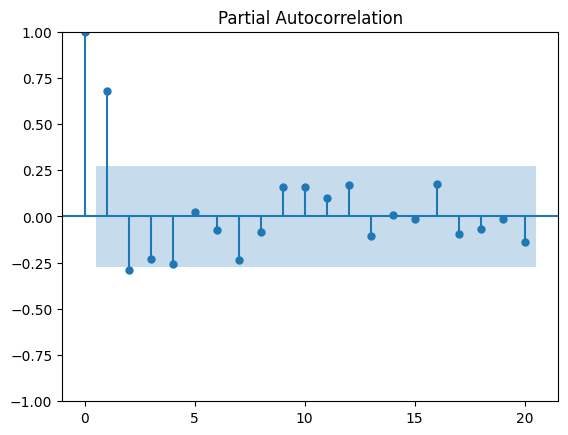

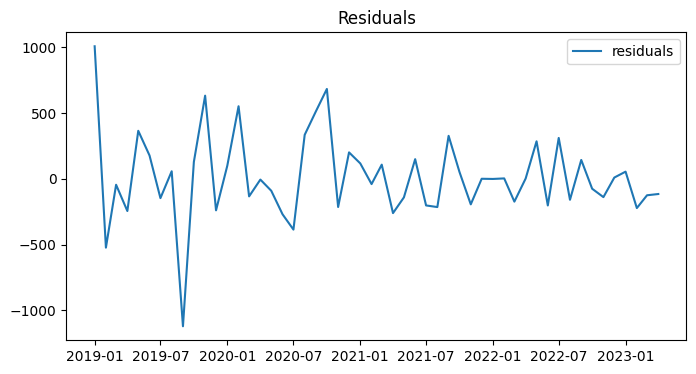

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 44027.38759287811
Mean Absolute Error for sarima: 156.08681618107227
Accuracy(%) for sarima: 91.37779828178739
####### exec end ##########





####### exec start ##########
exec for naive with index: 2





####### exec start ##########
exec for sarima with index: 2





####### exec start ##########
exec for naive with index: 3





####### exec start ##########
exec for sarima with index: 3





####### exec start ##########
exec for naive with index: 4





####### exec start ##########
exec for sarima with index: 4





####### exec start ##########
exec for naive with index: 5





####### exec start ##########
exec for sarima with index: 5





####### exec start ##########
exec for naive with index: 6
('Gujarat', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN valu

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

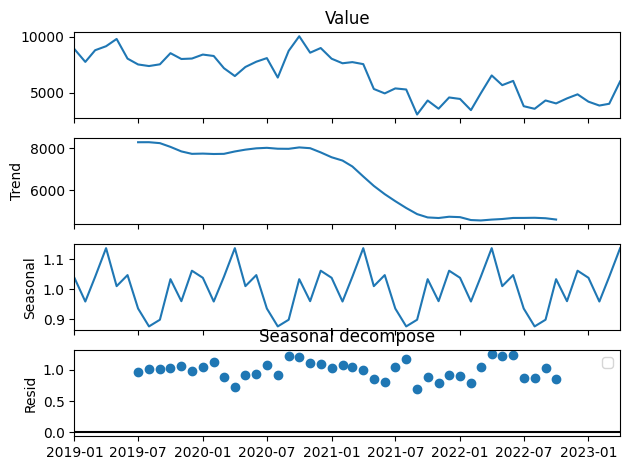

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


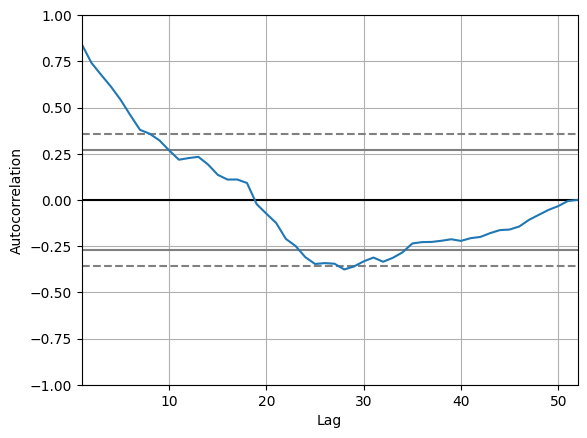

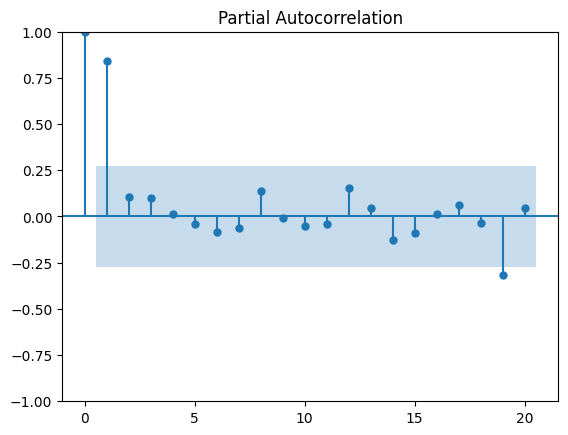

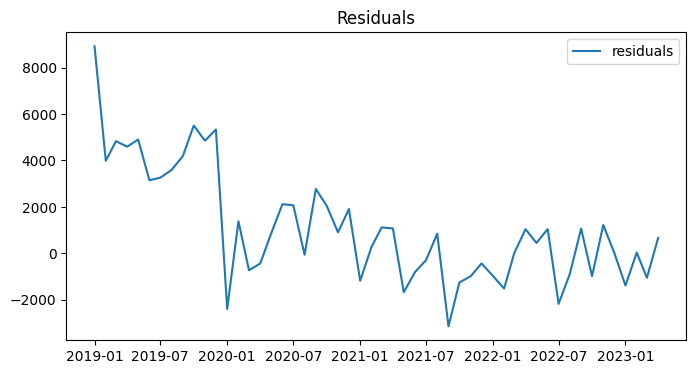

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 9386775.403347738
Mean Absolute Error for sarima: 2802.3678911430834
Accuracy(%) for sarima: 64.58055937045924
####### exec end ##########





####### exec start ##########
exec for naive with index: 7
('Gujarat', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 1689133.053369231
Mean Absolute Error for naive: 1003.5246153846153
Accuracy(%) for naive: 78.87106861434846
####### exec end ##########





####### exec start ##########
exec for sarima with index: 7
('Gujarat', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN v

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

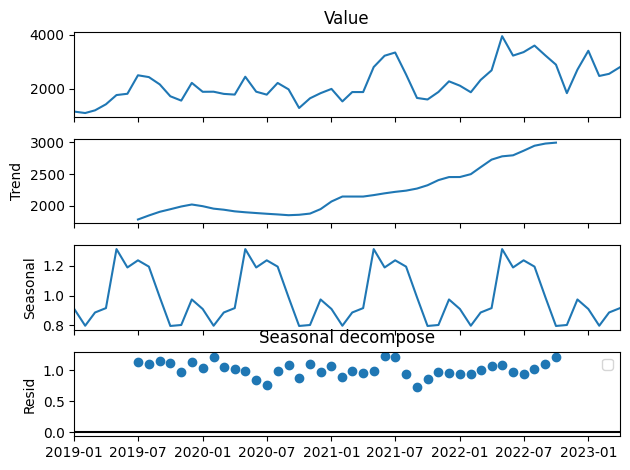

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

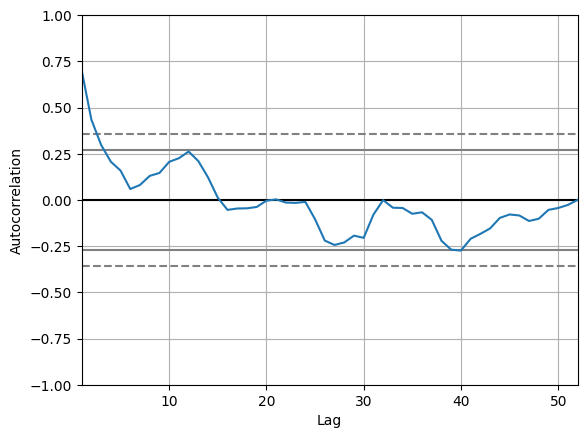

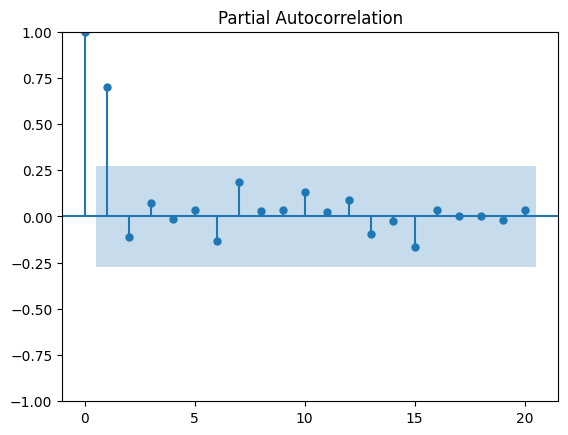

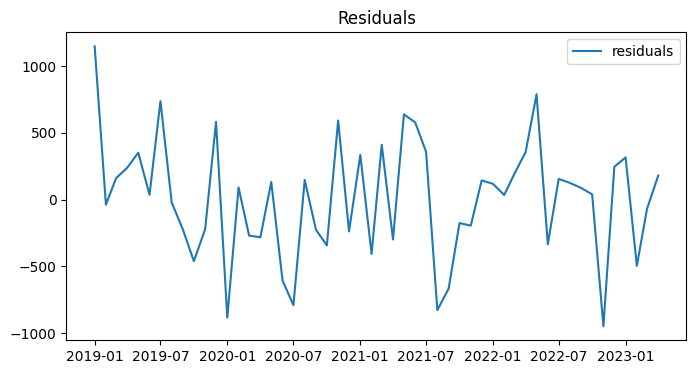

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 601696.0114655637
Mean Absolute Error for sarima: 553.1978196981568
Accuracy(%) for sarima: 87.3977407034501
####### exec end ##########





####### exec start ##########
exec for naive with index: 8





####### exec start ##########
exec for sarima with index: 8





####### exec start ##########
exec for naive with index: 9





####### exec start ##########
exec for sarima with index: 9





####### exec start ##########
exec for naive with index: 10





####### exec start ##########
exec for sarima with index: 10





####### exec start ##########
exec for naive with index: 11





####### exec start ##########
exec for sarima with index: 11





####### exec start ##########
exec for naive with index: 12
('Karnataka', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

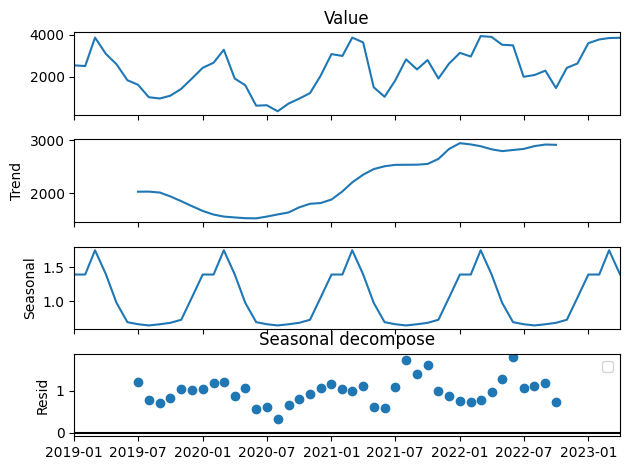

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


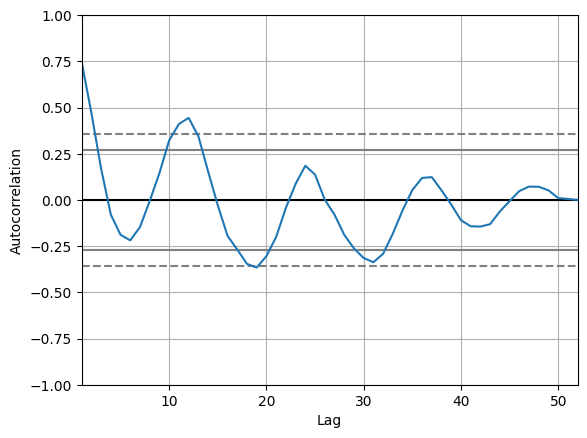

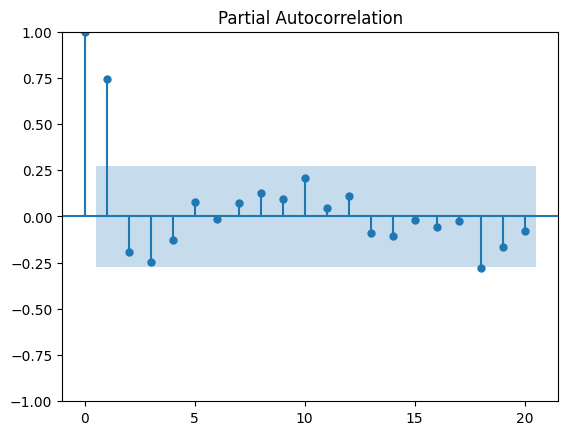

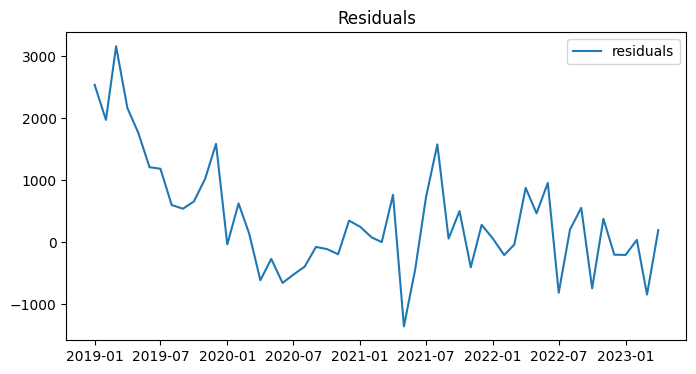

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 555982.9310899228
Mean Absolute Error for sarima: 555.9403863752652
Accuracy(%) for sarima: 85.54258199984316
####### exec end ##########





####### exec start ##########
exec for naive with index: 13
('Karnataka', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 147772.5204384616
Mean Absolute Error for naive: 284.8515384615385
Accuracy(%) for naive: 92.23196475948225
####### exec end ##########





####### exec start ##########
exec for sarima with index: 13
('Karnataka', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any N

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

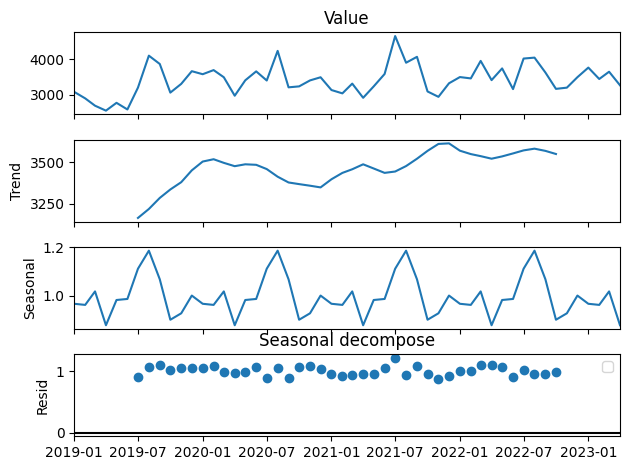

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


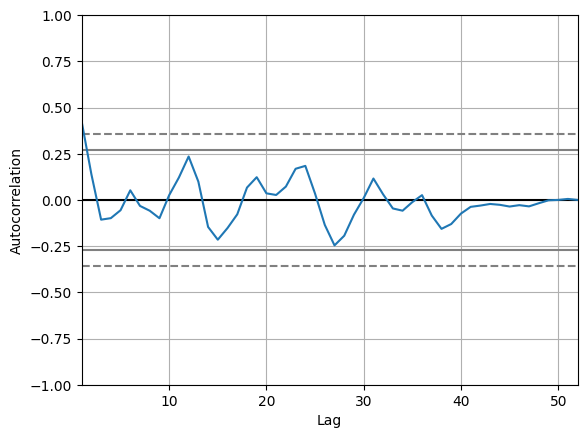

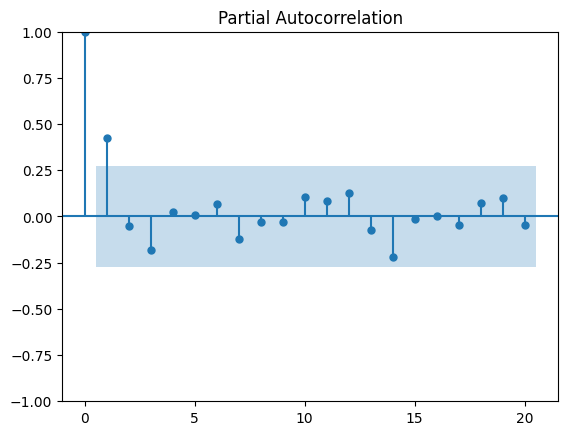

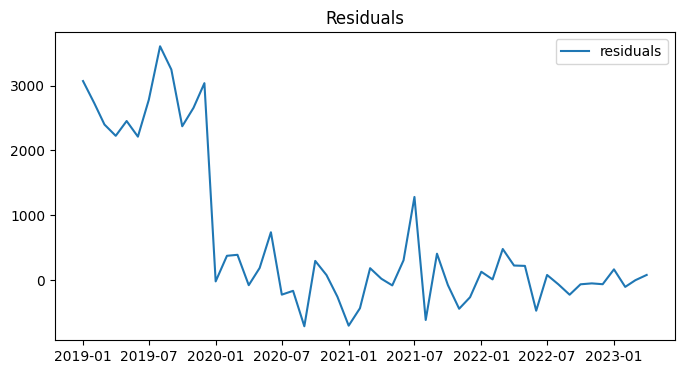

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X





---------------------------------------------------------
Mean Squared Error for sarima: 223365.05575658477
Mean Absolute Error for sarima: 417.4632303977421
Accuracy(%) for sarima: 88.26134087348389
####### exec end ##########





####### exec start ##########
exec for naive with index: 14





####### exec start ##########
exec for sarima with index: 14





####### exec start ##########
exec for naive with index: 15





####### exec start ##########
exec for sarima with index: 15





####### exec start ##########
exec for naive with index: 16





####### exec start ##########
exec for sarima with index: 16





####### exec start ##########
exec for naive with index: 17





####### exec start ##########
exec for sarima with index: 17





####### exec start ##########
exec for naive with index: 18
('Maharashtra', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with

<Figure size 800x400 with 0 Axes>

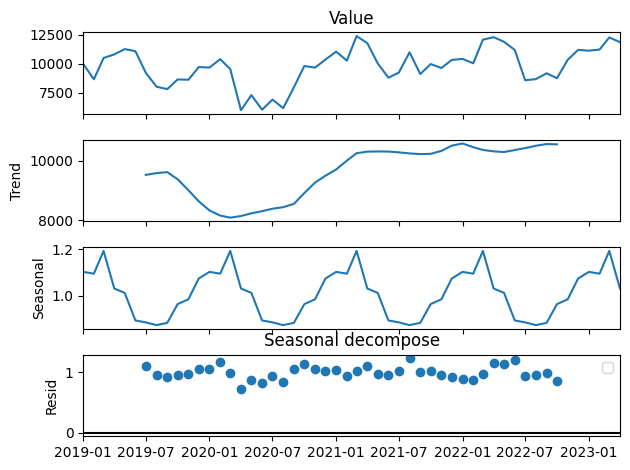

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


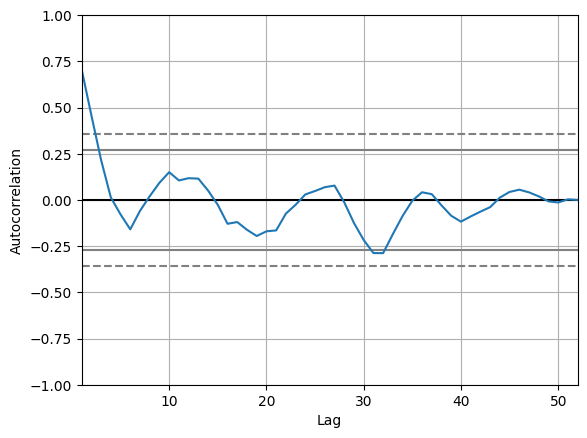

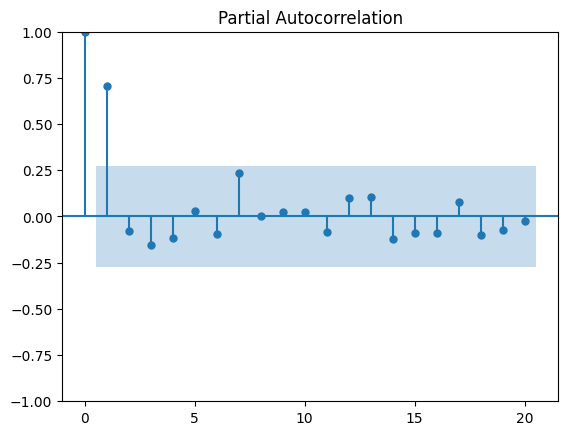

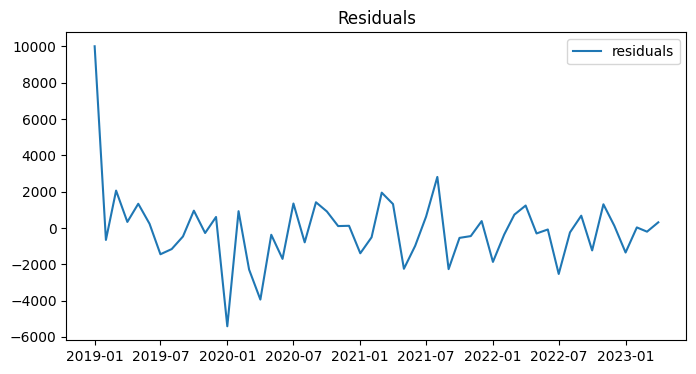

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 389503.1067640431
Mean Absolute Error for sarima: 505.6300637256449
Accuracy(%) for sarima: 95.7755543010656
####### exec end ##########





####### exec start ##########
exec for naive with index: 19
('Maharashtra', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 89850.85983076923
Mean Absolute Error for naive: 248.1261538461538
Accuracy(%) for naive: 88.42845645104191
####### exec end ##########





####### exec start ##########
exec for sarima with index: 19
('Maharashtra', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with an

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

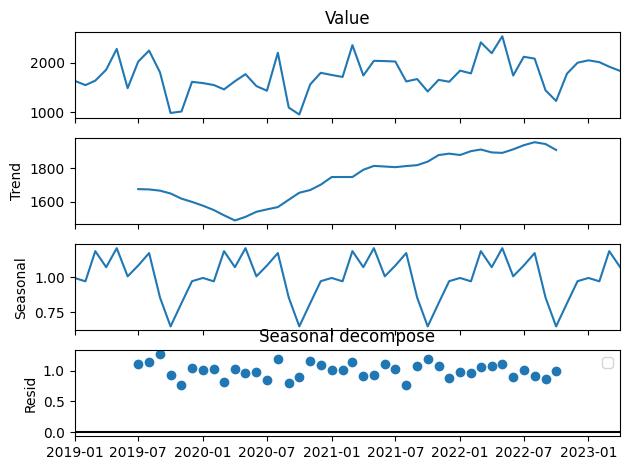

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

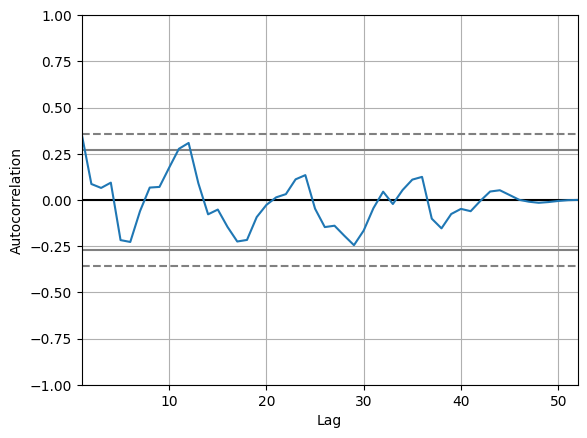

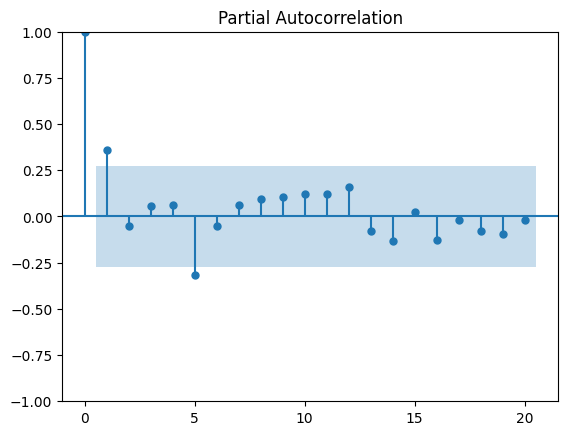

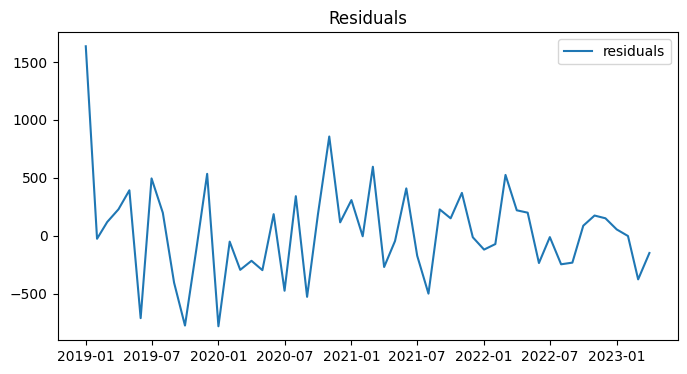

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 38343.79353619108
Mean Absolute Error for sarima: 153.41731458559323
Accuracy(%) for sarima: 93.17450214312682
####### exec end ##########





####### exec start ##########
exec for naive with index: 20





####### exec start ##########
exec for sarima with index: 20





####### exec start ##########
exec for naive with index: 21





####### exec start ##########
exec for sarima with index: 21





####### exec start ##########
exec for naive with index: 22





####### exec start ##########
exec for sarima with index: 22





####### exec start ##########
exec for naive with index: 23





####### exec start ##########
exec for sarima with index: 23





####### exec start ##########
exec for naive with index: 24
('Rajasthan', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with a

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

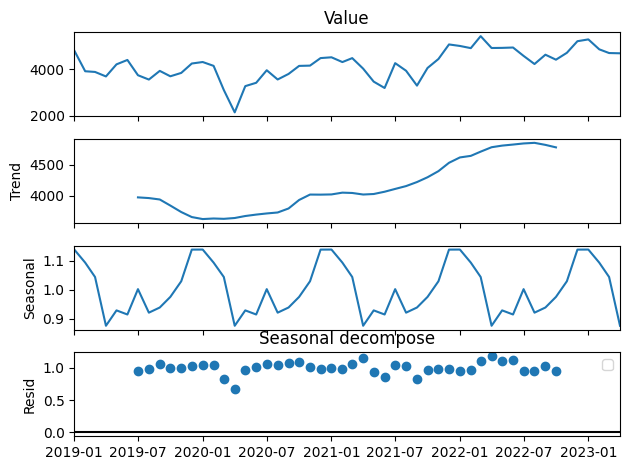

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

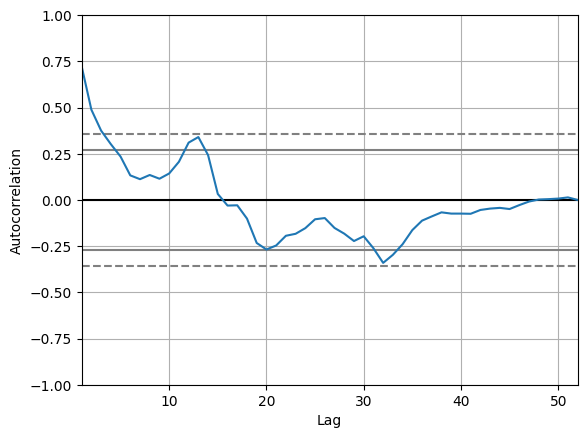

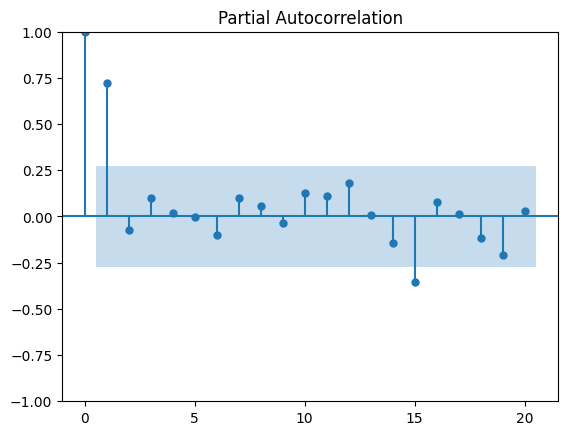

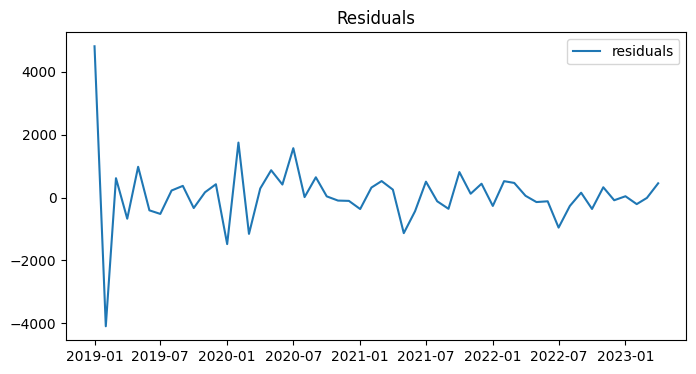

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 209030.18251860686
Mean Absolute Error for sarima: 411.3393441019811
Accuracy(%) for sarima: 92.41972379089898
####### exec end ##########





####### exec start ##########
exec for naive with index: 25
('Rajasthan', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 362145.91559230746
Mean Absolute Error for naive: 519.6084615384614
Accuracy(%) for naive: 88.08129634409954
####### exec end ##########





####### exec start ##########
exec for sarima with index: 25
('Rajasthan', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

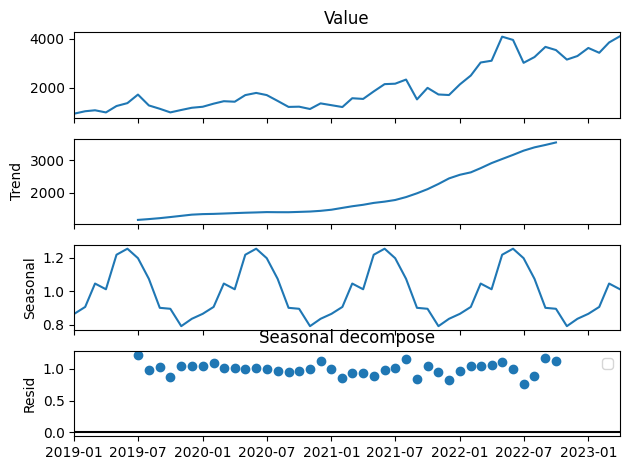

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

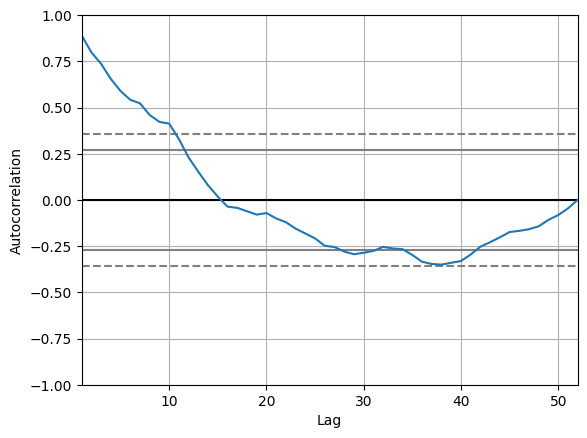

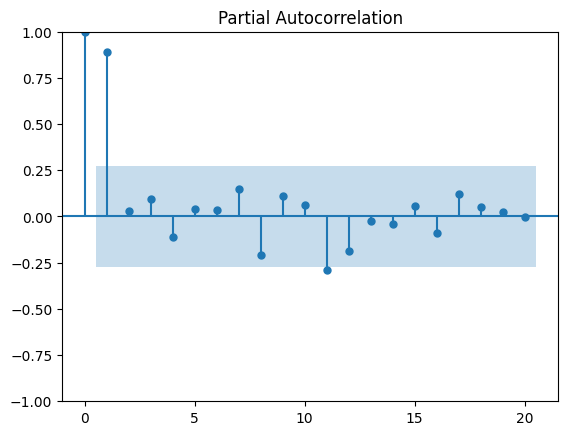

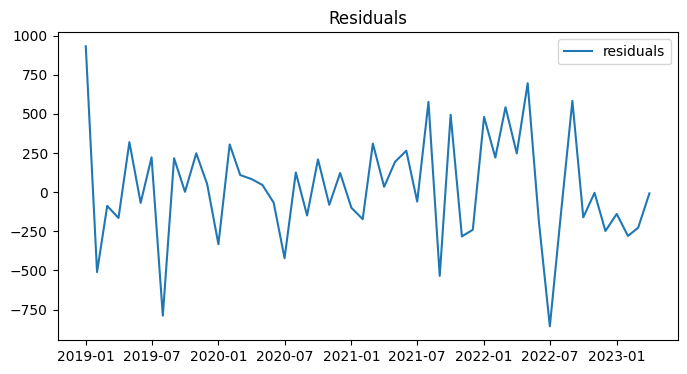




---------------------------------------------------------
Mean Squared Error for sarima: 1020126.9941482034
Mean Absolute Error for sarima: 889.2299914356768
Accuracy(%) for sarima: 82.48769272592074
####### exec end ##########





####### exec start ##########
exec for naive with index: 26





####### exec start ##########
exec for sarima with index: 26





####### exec start ##########
exec for naive with index: 27





####### exec start ##########
exec for sarima with index: 27





####### exec start ##########
exec for naive with index: 28





####### exec start ##########
exec for sarima with index: 28





####### exec start ##########
exec for naive with index: 29





####### exec start ##########
exec for sarima with index: 29





####### exec start ##########
exec for naive with index: 30





####### exec start ##########
exec for sarima with index: 30





####### exec start ##########
exec for naive with index: 31





####### exec start ##########
exec for sarim

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [90]:
#model_list = sorted(['naive', 'arima', 'sarima', 'RF'])
model_list = sorted(['sarima', 'naive'])
model_to_acc = {}
model_params[('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')]['d'] = 2
model_params[('Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')]['d'] = 2
model_params[('Gujarat', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')]['d'] = 0
model_params[('Karnataka', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')]['d'] = 0
model_params[('Karnataka', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')]['d'] = 0
model_params[('Rajasthan', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh')]['d'] = 2
model_params[('Rajasthan', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh')]['d'] = 2

variable_combinations = sorted(variable_combinations)
print("\n data samples",len(variable_combinations))
for idx, key in enumerate(variable_combinations):
  for model_name in model_list:
    print("\n\n\n\n")
    #key = ('Tamil Nadu', 'Installed Capacity', 'Aggregate fuel', 'Renewables', 'MW')

    print("####### exec start ##########")
    print(f"exec for {model_name} with index: {idx}")

    if key[0] == 'Tamil Nadu':
      continue
    if key[1] == 'Installed Capacity':
      continue
    if key[1] == 'Power sector emissions':
      continue





    print(key)

    acc = run_model_training(dataframe = df6, combinaton_to_run = key, model_name = model_name, model_params = model_params, visual_model_test = False, visual_model_train = False, visual_basic = True)

    model_to_acc[(model_name,) + key] = acc[1]
    print("####### exec end ##########")


In [91]:
acc_table = collections.defaultdict(list)
for k, v in model_to_acc.items():
  print(k, v)
  model_name, _, variable, _, _, _ = k
  acc_table[(model_name, variable)].append(v)

('naive', 'Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh') 434.94461538461553
('sarima', 'Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh') 473.7985720202505
('naive', 'Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh') 242.36692307692311
('sarima', 'Andhra Pradesh', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh') 156.08681618107227
('naive', 'Gujarat', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh') 1074.0930769230768
('sarima', 'Gujarat', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh') 2802.3678911430834
('naive', 'Gujarat', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh') 1003.5246153846153
('sarima', 'Gujarat', 'Electricity generation', 'Aggregate fuel', 'Renewables', 'GWh') 553.1978196981568
('naive', 'Karnataka', 'Electricity generation', 'Aggregate fuel', 'Fossil', 'GWh') 454.65384615384613
('sarima', 'Karnataka', 'Electricity genera

In [92]:
for k, v in acc_table.items():
  print(k, np.mean(v))

('naive', 'Electricity generation') 524.2538461538461
('sarima', 'Electricity generation') 691.8471429664465



 data samples 36





####### exec start ##########
exec for naive with index: 0





####### exec start ##########
exec for sarima with index: 0





####### exec start ##########
exec for naive with index: 1





####### exec start ##########
exec for sarima with index: 1





####### exec start ##########
exec for naive with index: 2





####### exec start ##########
exec for sarima with index: 2





####### exec start ##########
exec for naive with index: 3





####### exec start ##########
exec for sarima with index: 3





####### exec start ##########
exec for naive with index: 4
('Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 230432.59726923055
Mean Absolute Error for naive: 356.5346153846152
Accuracy(%) for 

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

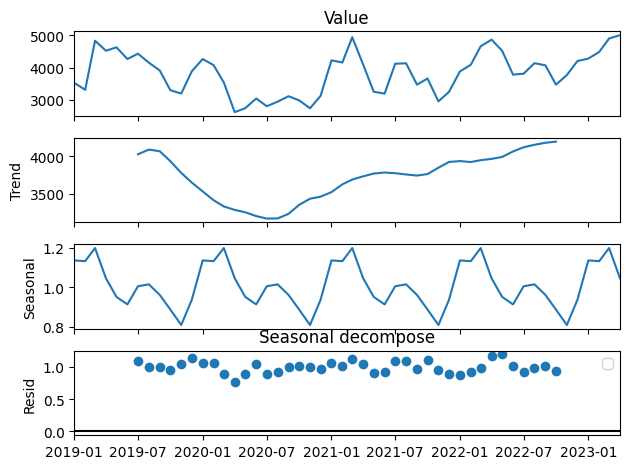

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


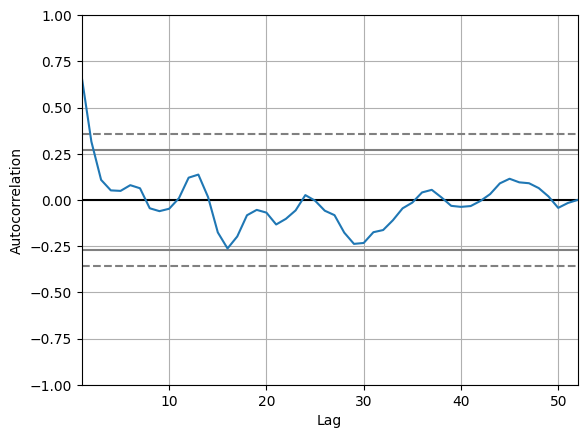

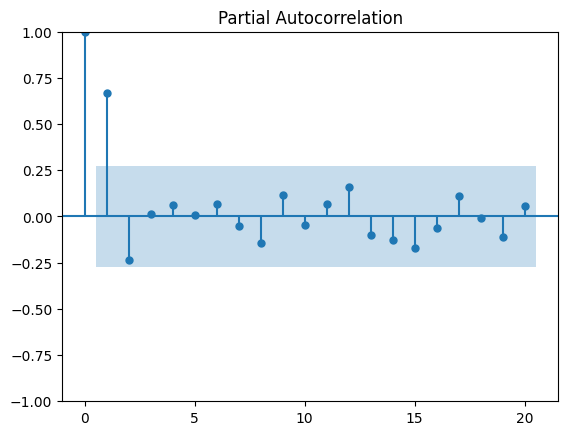

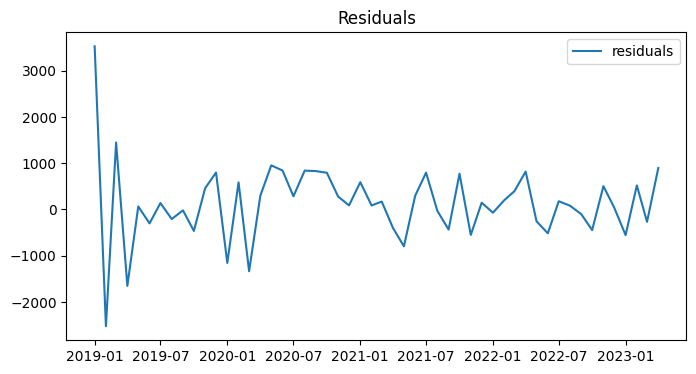

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X





---------------------------------------------------------
Mean Squared Error for sarima: 274075.0170299945
Mean Absolute Error for sarima: 421.5136248294215
Accuracy(%) for sarima: 92.20985000602727
####### exec end ##########





####### exec start ##########
exec for naive with index: 5
('Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 13.632623076923077
Mean Absolute Error for naive: 2.9023076923076925
Accuracy(%) for naive: 93.8597276452798
####### exec end ##########





####### exec start ##########
exec for sarima with index: 5
('Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of ro

<Figure size 800x400 with 0 Axes>

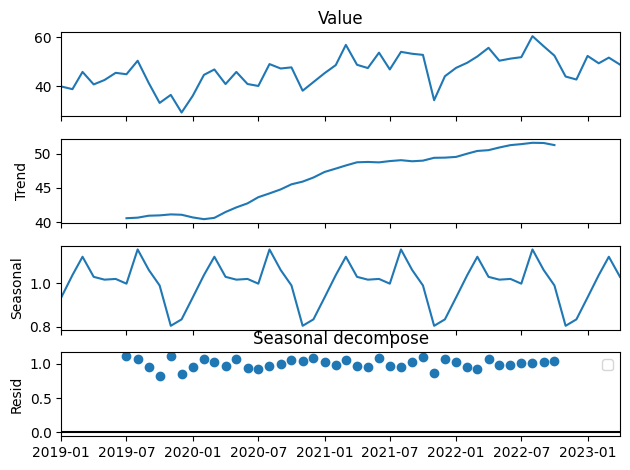

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


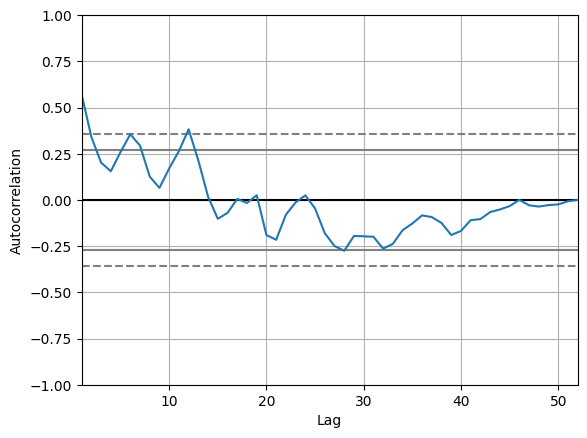

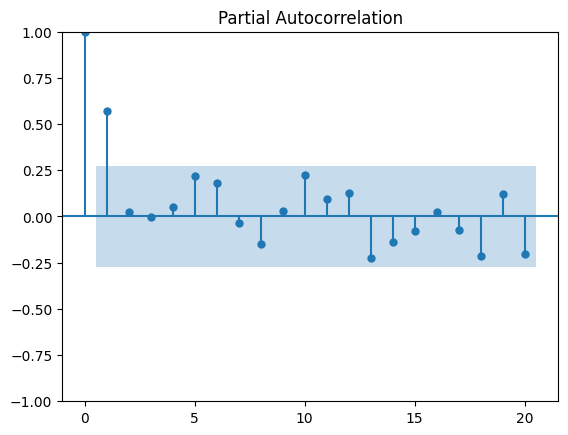

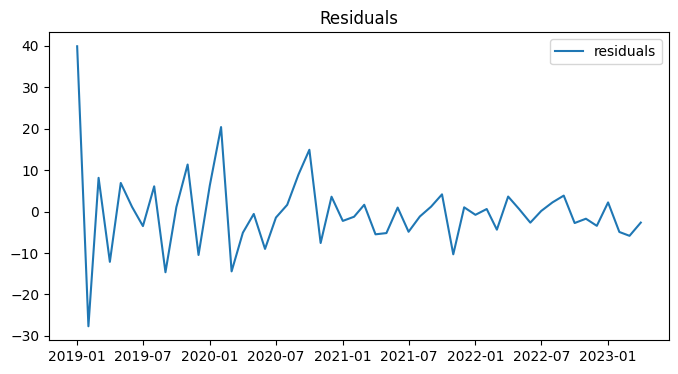

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 8.340982788132198
Mean Absolute Error for sarima: 2.50783699254245
Accuracy(%) for sarima: 94.92315989697326
####### exec end ##########





####### exec start ##########
exec for naive with index: 6





####### exec start ##########
exec for sarima with index: 6





####### exec start ##########
exec for naive with index: 7





####### exec start ##########
exec for sarima with index: 7





####### exec start ##########
exec for naive with index: 8





####### exec start ##########
exec for sarima with index: 8





####### exec start ##########
exec for naive with index: 9





####### exec start ##########
exec for sarima with index: 9





####### exec start ##########
exec for naive with index: 10
('Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN val

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


P-value:  0.1833583402890553


<Figure size 800x400 with 0 Axes>

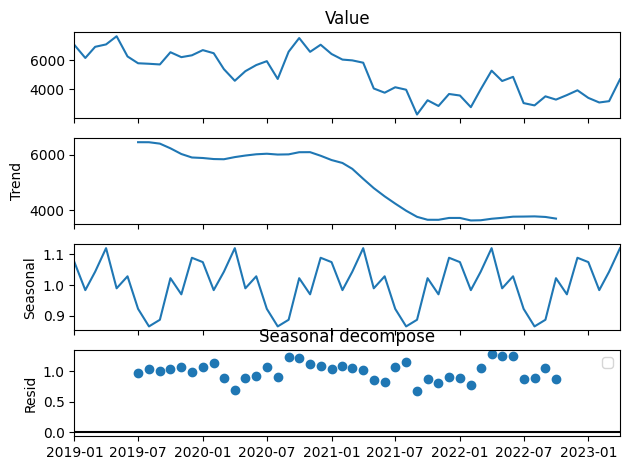

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


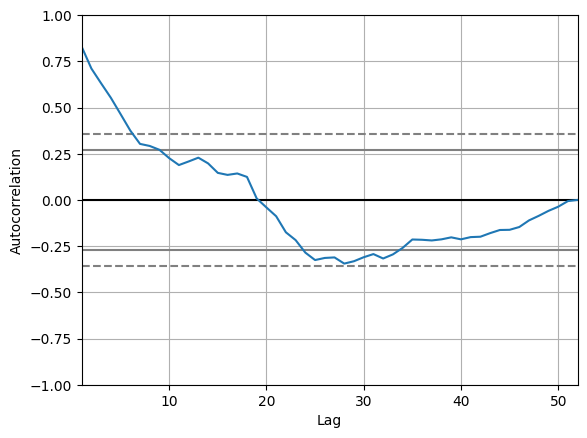

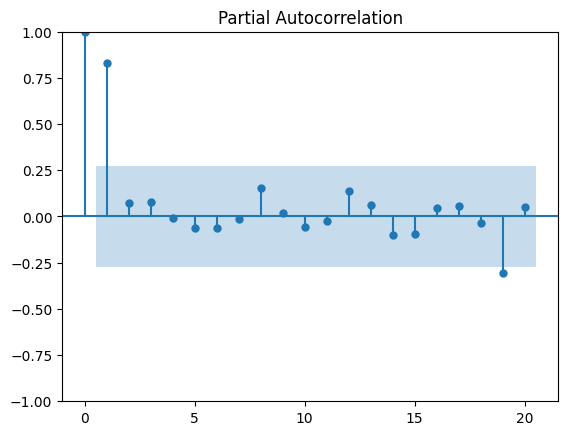

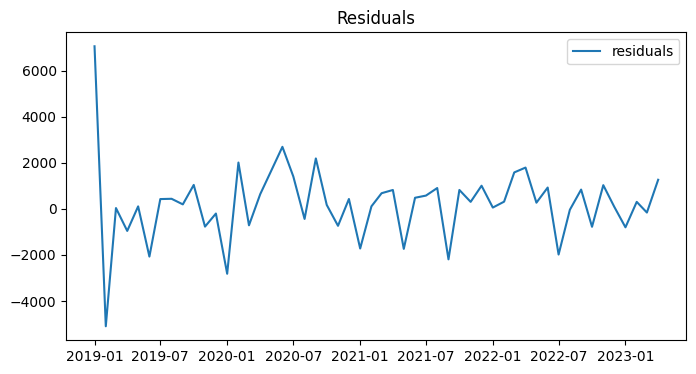

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 12338861.9917529
Mean Absolute Error for sarima: 3257.3018867722276
Accuracy(%) for sarima: 47.1531422274196
####### exec end ##########





####### exec start ##########
exec for naive with index: 11
('Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 443.7379538461539
Mean Absolute Error for naive: 16.29230769230769
Accuracy(%) for naive: 84.47777659443436
####### exec end ##########





####### exec start ##########
exec for sarima with index: 11
('Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any Na

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

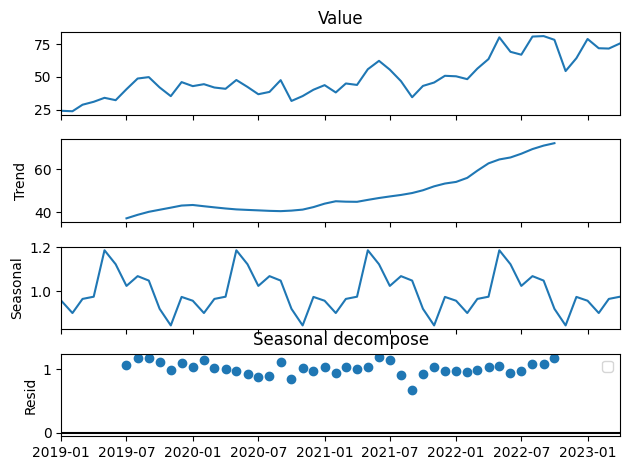

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


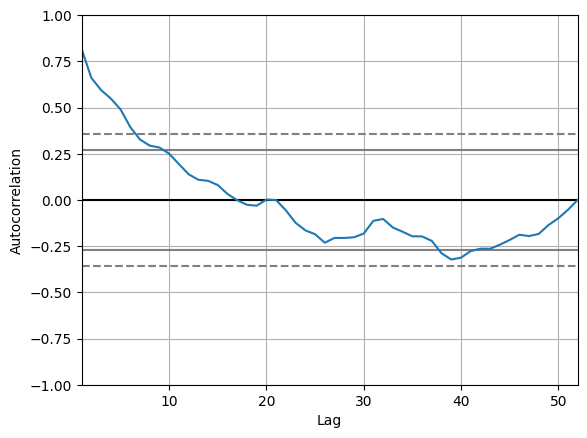

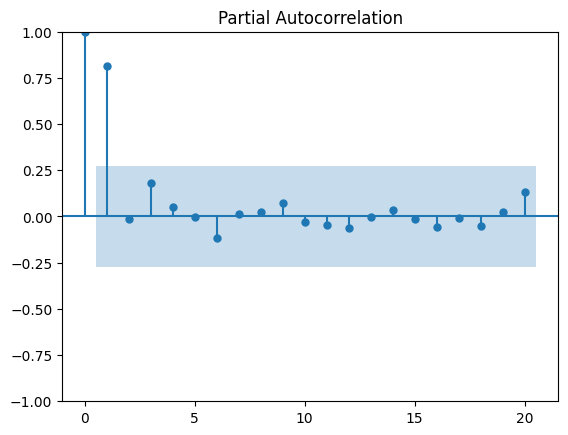

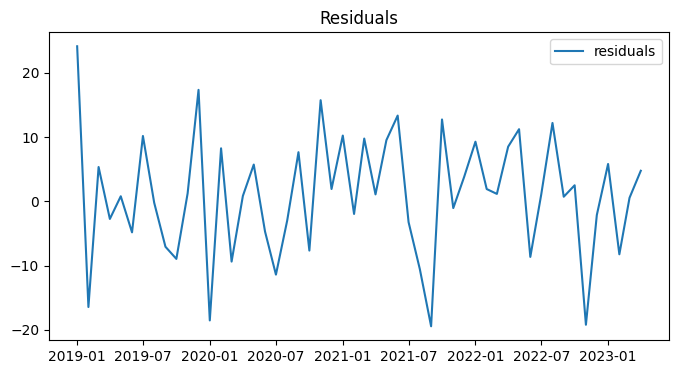

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 147.54585633445205
Mean Absolute Error for sarima: 10.389345069145646
Accuracy(%) for sarima: 89.48835349376243
####### exec end ##########





####### exec start ##########
exec for naive with index: 12





####### exec start ##########
exec for sarima with index: 12





####### exec start ##########
exec for naive with index: 13





####### exec start ##########
exec for sarima with index: 13





####### exec start ##########
exec for naive with index: 14





####### exec start ##########
exec for sarima with index: 14





####### exec start ##########
exec for naive with index: 15





####### exec start ##########
exec for sarima with index: 15





####### exec start ##########
exec for naive with index: 16
('Karnataka', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows wit

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

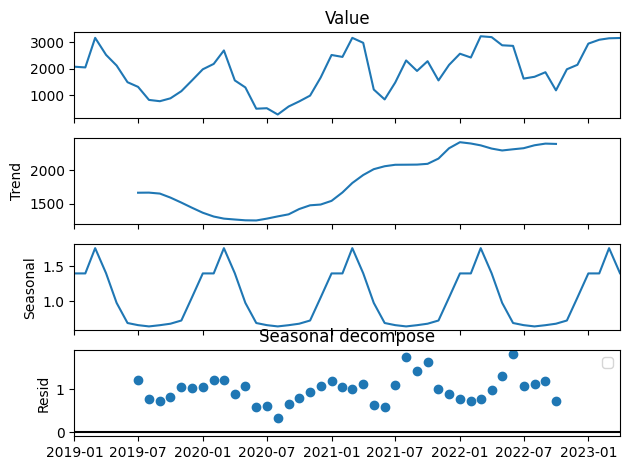

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


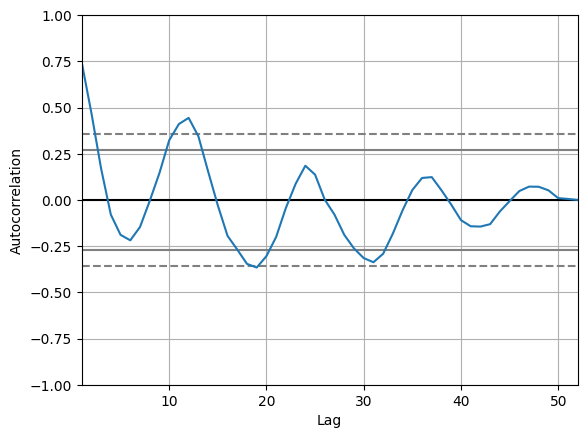

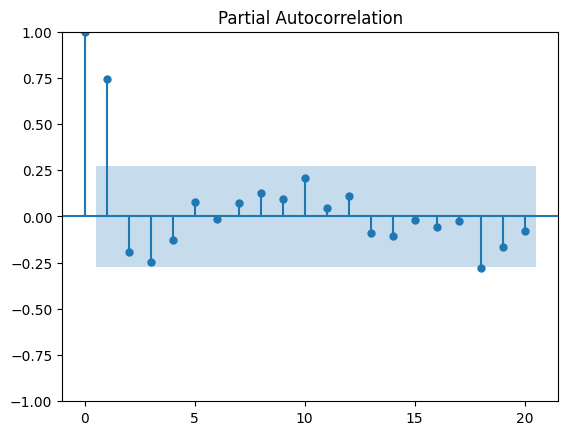

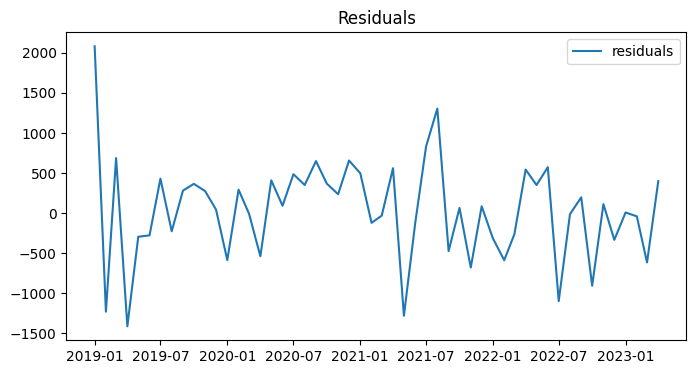

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X





---------------------------------------------------------
Mean Squared Error for sarima: 541467.1591197475
Mean Absolute Error for sarima: 598.3877807059388
Accuracy(%) for sarima: 80.48837530855768
####### exec end ##########





####### exec start ##########
exec for naive with index: 17
('Karnataka', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 716.9146615384614
Mean Absolute Error for naive: 22.32923076923076
Accuracy(%) for naive: 85.47692982981144
####### exec end ##########





####### exec start ##########
exec for sarima with index: 17
('Karnataka', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with a

<Figure size 800x400 with 0 Axes>

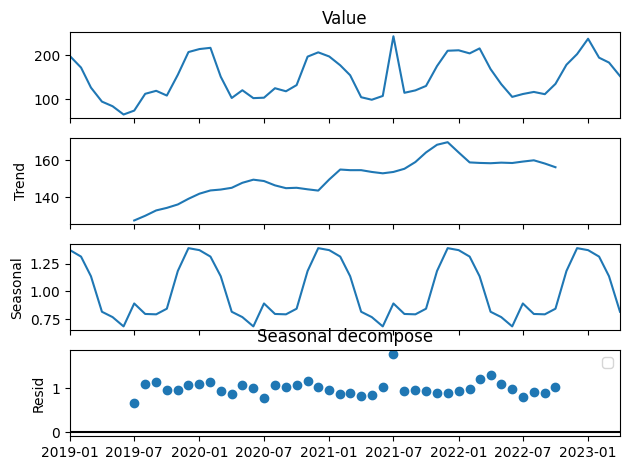

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


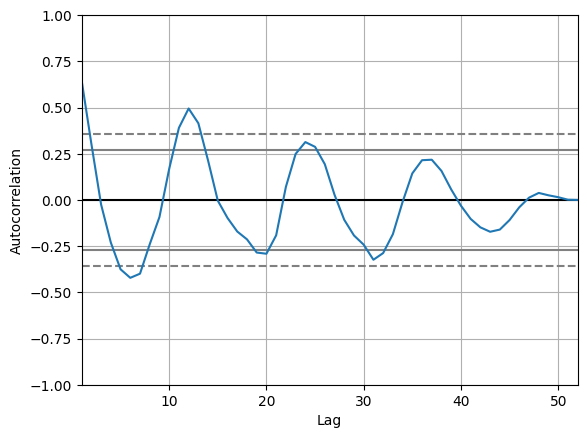

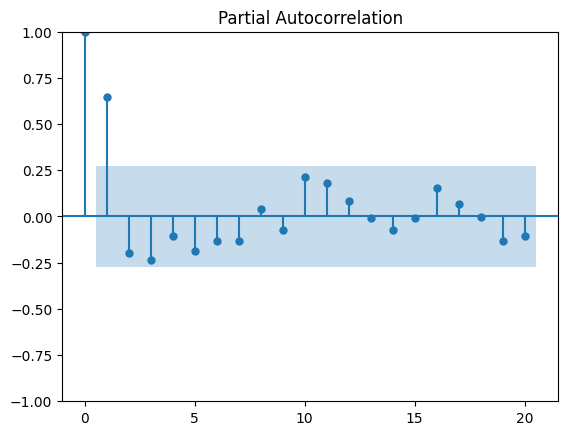

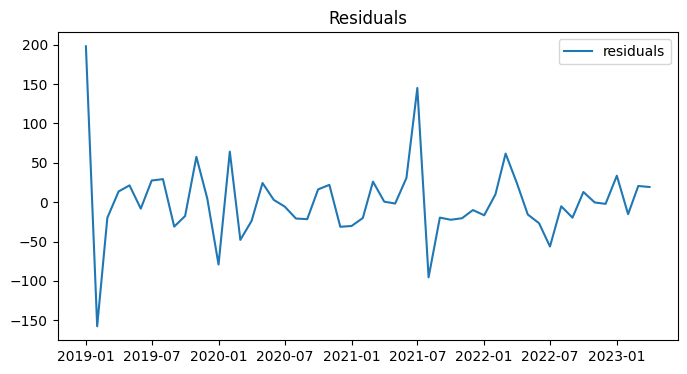

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 938.3991625939384
Mean Absolute Error for sarima: 26.894097499592974
Accuracy(%) for sarima: 84.00361723136689
####### exec end ##########





####### exec start ##########
exec for naive with index: 18





####### exec start ##########
exec for sarima with index: 18





####### exec start ##########
exec for naive with index: 19





####### exec start ##########
exec for sarima with index: 19





####### exec start ##########
exec for naive with index: 20





####### exec start ##########
exec for sarima with index: 20





####### exec start ##########
exec for naive with index: 21





####### exec start ##########
exec for sarima with index: 21





####### exec start ##########
exec for naive with index: 22
('Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows wi

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

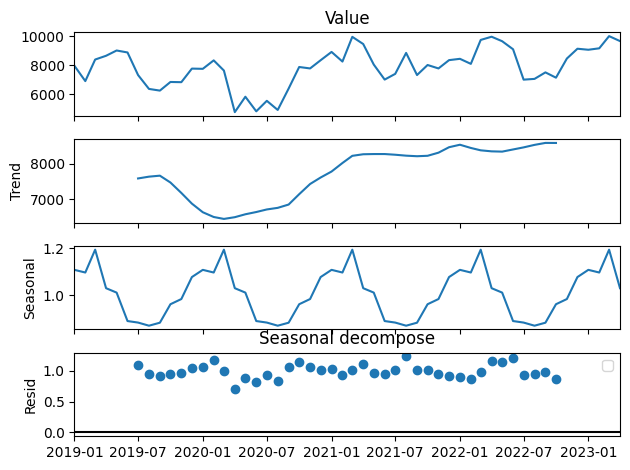

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


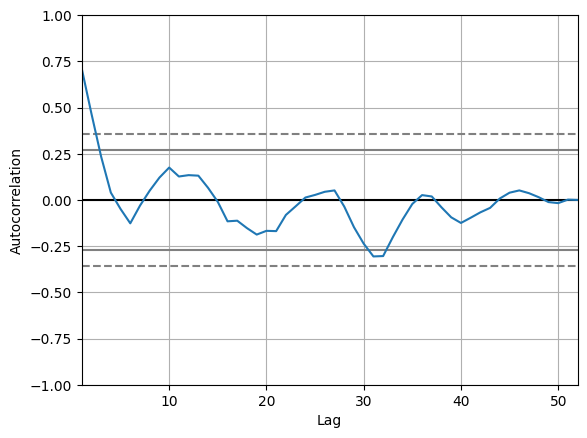

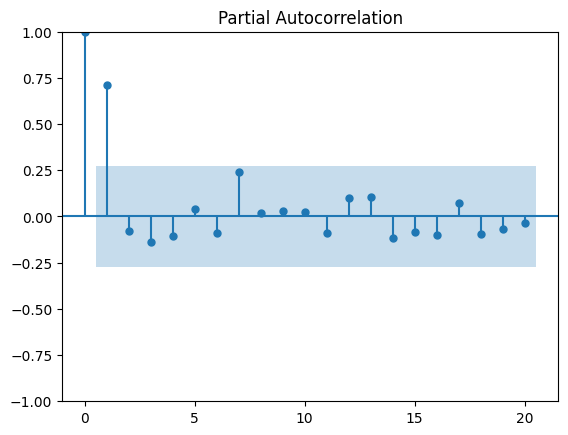

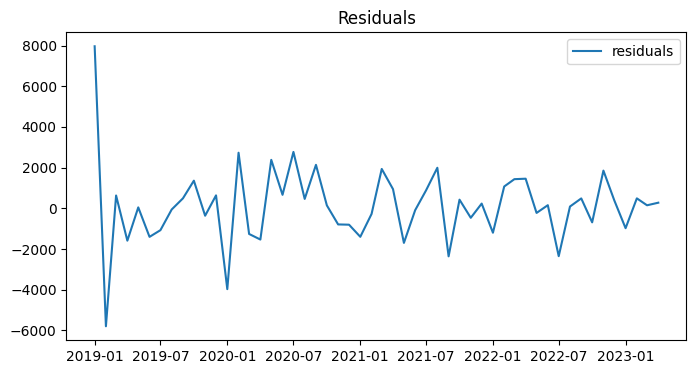

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 635431.4341452825
Mean Absolute Error for sarima: 627.8507632026858
Accuracy(%) for sarima: 93.4513182139936
####### exec end ##########





####### exec start ##########
exec for naive with index: 23
('Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 1490.9502692307692
Mean Absolute Error for naive: 26.291538461538458
Accuracy(%) for naive: 80.47422645294301
####### exec end ##########





####### exec start ##########
exec for sarima with index: 23
('Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows w

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

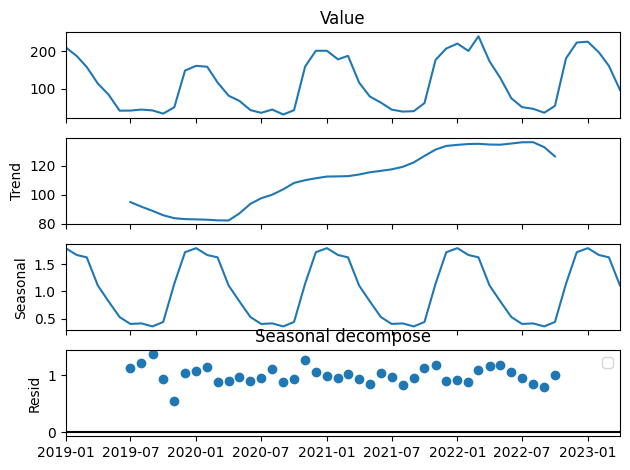

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


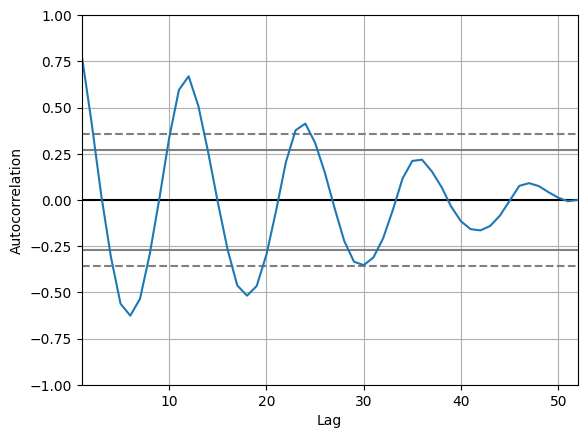

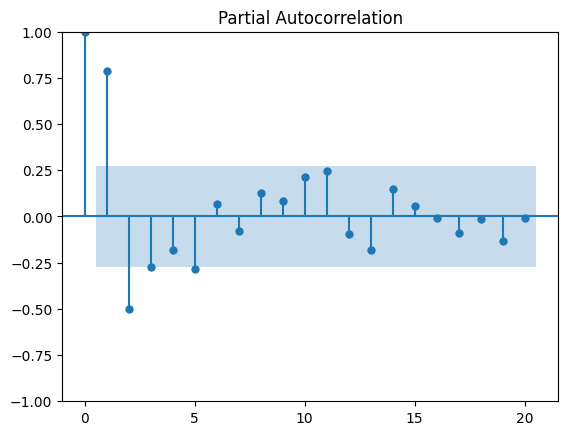

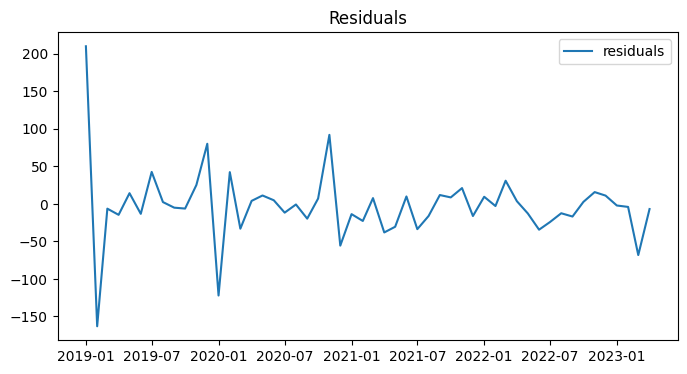

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X





---------------------------------------------------------
Mean Squared Error for sarima: 5152.150797269483
Mean Absolute Error for sarima: 58.5177582565033
Accuracy(%) for sarima: 53.15898173401612
####### exec end ##########





####### exec start ##########
exec for naive with index: 24





####### exec start ##########
exec for sarima with index: 24





####### exec start ##########
exec for naive with index: 25





####### exec start ##########
exec for sarima with index: 25





####### exec start ##########
exec for naive with index: 26





####### exec start ##########
exec for sarima with index: 26





####### exec start ##########
exec for naive with index: 27





####### exec start ##########
exec for sarima with index: 27





####### exec start ##########
exec for naive with index: 28
('Rajasthan', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with a

<Figure size 800x400 with 0 Axes>

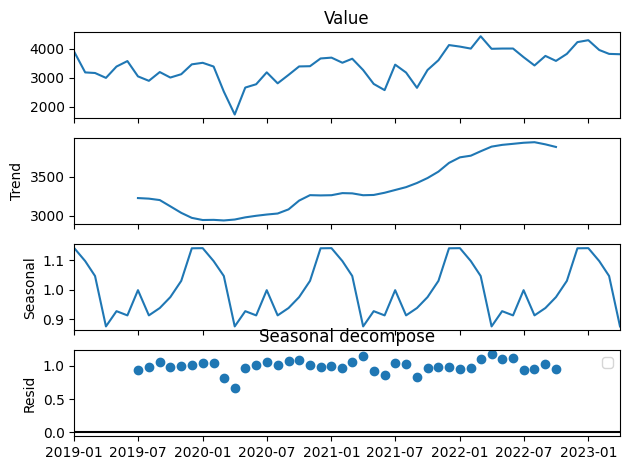

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizat

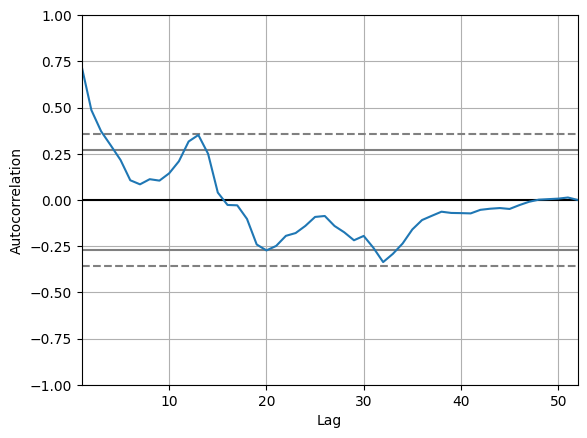

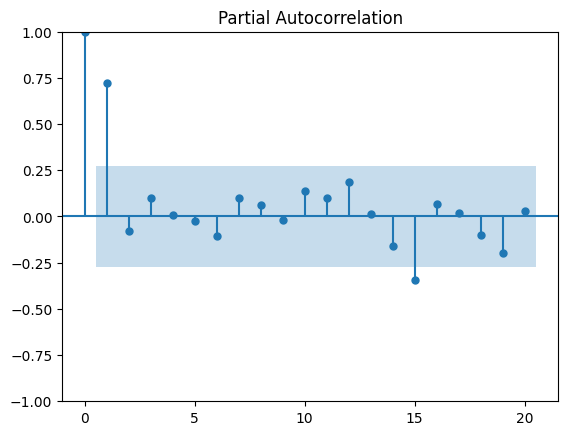

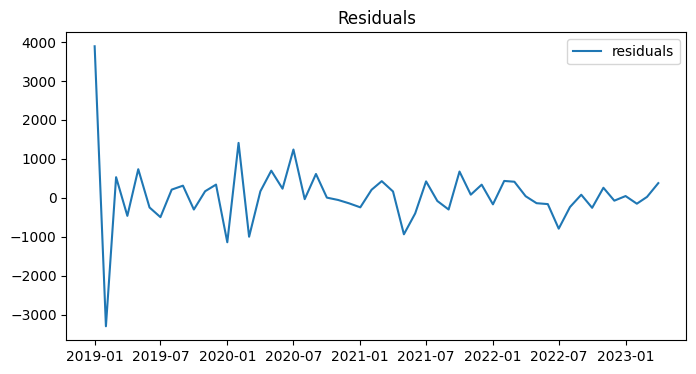

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)





---------------------------------------------------------
Mean Squared Error for sarima: 129373.76982444609
Mean Absolute Error for sarima: 325.06611931884515
Accuracy(%) for sarima: 92.67922445536111
####### exec end ##########





####### exec start ##########
exec for naive with index: 29
('Rajasthan', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with any NaN values: 0

Rows with NaN values:



---------------------------------------------------------
Mean Squared Error for naive: 446.18393076923076
Mean Absolute Error for naive: 16.01923076923077
Accuracy(%) for naive: 91.3587450156838
####### exec end ##########





####### exec start ##########
exec for sarima with index: 29
('Rajasthan', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')
Does the filtered DataFrame have any NaN values? False

NaN values in each column:

Number of rows with

<ipython-input-89-82150bd37cdb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_data_dropped['Value'][:-test_length] = train_X


<Figure size 800x400 with 0 Axes>

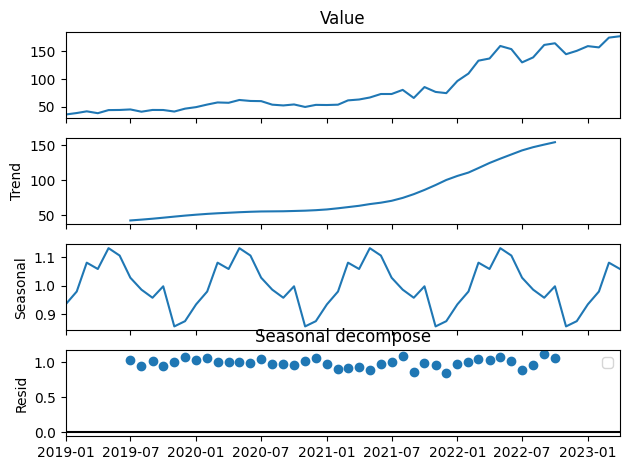

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


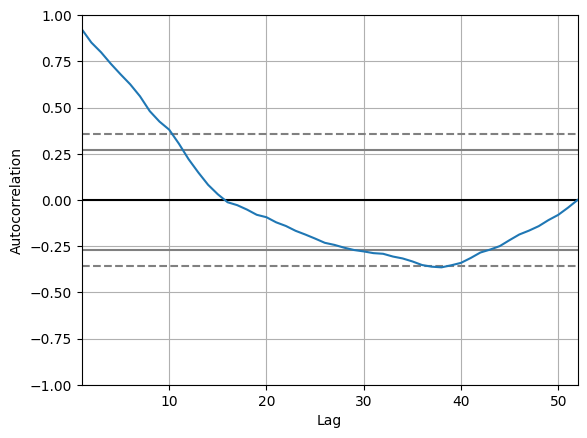

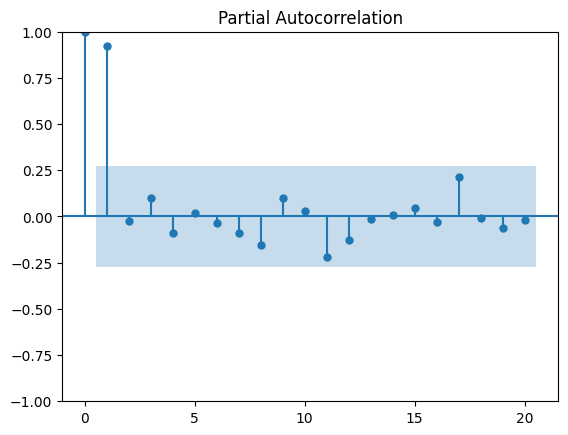

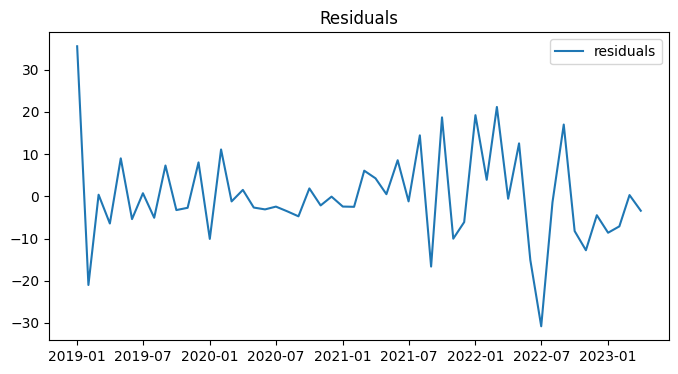




---------------------------------------------------------
Mean Squared Error for sarima: 387.33115511617495
Mean Absolute Error for sarima: 14.929189269103784
Accuracy(%) for sarima: 91.99426088077956
####### exec end ##########





####### exec start ##########
exec for naive with index: 30





####### exec start ##########
exec for sarima with index: 30





####### exec start ##########
exec for naive with index: 31





####### exec start ##########
exec for sarima with index: 31





####### exec start ##########
exec for naive with index: 32





####### exec start ##########
exec for sarima with index: 32





####### exec start ##########
exec for naive with index: 33





####### exec start ##########
exec for sarima with index: 33





####### exec start ##########
exec for naive with index: 34





####### exec start ##########
exec for sarima with index: 34





####### exec start ##########
exec for naive with index: 35





####### exec start ##########
exec for sari

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [93]:
#model_list = sorted(['naive', 'arima', 'sarima', 'RF'])
model_list = sorted(['sarima', 'naive'])
model_to_acc = {}
model_params[('sarima', 'Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')] = 1
model_params[('sarima', 'Karnataka', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2')] = 1
model_params[('sarima', 'Maharashtra', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2')] = 1


variable_combinations = sorted(variable_combinations)
print("\n data samples",len(variable_combinations))
for idx, key in enumerate(variable_combinations):
  for model_name in model_list:
    print("\n\n\n\n")
    #key = ('Tamil Nadu', 'Installed Capacity', 'Aggregate fuel', 'Renewables', 'MW')

    print("####### exec start ##########")
    print(f"exec for {model_name} with index: {idx}")

    if key[0] == 'Tamil Nadu':
      continue
    if key[1] == 'Installed Capacity':
      continue
    if key[1] == 'Electricity generation':
      continue





    print(key)
    model_params[key]['d'] = 2

    acc = run_model_training(dataframe = df6, combinaton_to_run = key, model_name = model_name, model_params = model_params, visual_model_test = False, visual_model_train = False, visual_basic = True)

    model_to_acc[(model_name,) + key] = acc[1]
    print("####### exec end ##########")

In [94]:
acc_table = collections.defaultdict(list)
for k, v in model_to_acc.items():
  print(k, v)
  model_name, _, variable, _, _, _ = k
  acc_table[(model_name, variable)].append(v)

('naive', 'Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2') 356.5346153846152
('sarima', 'Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2') 421.5136248294215
('naive', 'Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2') 2.9023076923076925
('sarima', 'Andhra Pradesh', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2') 2.50783699254245
('naive', 'Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2') 787.8907692307691
('sarima', 'Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2') 3257.3018867722276
('naive', 'Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2') 16.29230769230769
('sarima', 'Gujarat', 'Power sector emissions', 'Aggregate fuel', 'Renewables', 'ktCO2') 10.389345069145646
('naive', 'Karnataka', 'Power sector emissions', 'Aggregate fuel', 'Fossil', 'ktCO2') 372.8161538461539
('sarima', 'Karnataka', 'Power